### 7.5 공분산과 상관계수
- **표본공분산**: 자료가 평균값으로부터 얼마나 떨어져 있는지 나타낸 것

    $s_{xy} = {1 \over N}\Sigma (x_i - x\overline)(y_i - y\overline)$

- **표본상관계수**: 공분산을 각각의 표본표준편차값으로 나누어 정규화한 것

    $r_xy = {s_xy \over \sqrt{s_x^2 s_y^2}}$ ; 피어슨 상관계수
    - `sp.stats.pearsonr()`

In [1]:
from sklearn.datasets import load_iris
X = load_iris().data
x1 = X[:, 0] # 꽃받침 길이
x2 = X[:, 1] # 꽃받침 폭
x3 = X[:, 2] # 꽃잎 길이
x4 = X[:, 3] # 꽃잎 폭

In [3]:
print(f'꽃받침 길이와 꽃잎 길이: {sp.stats.pearsonr(x1, x3)[0]}\n꽃받침 길이와 꽃받침 폭: {sp.stats.pearsonr(x1, x2)[0]}\n꽃잎 길이와 꽃잎 폭: {sp.stats.pearsonr(x3, x4)[0]}\n꽃받침의 폭과 꽃잎의 폭: {sp.stats.pearsonr(x2, x4)[0]}')

꽃받침 길이와 꽃잎 길이: 0.8717537758865832
꽃받침 길이와 꽃받침 폭: -0.11756978413300204
꽃잎 길이와 꽃잎 폭: 0.962865431402796
꽃받침의 폭과 꽃잎의 폭: -0.3661259325364391


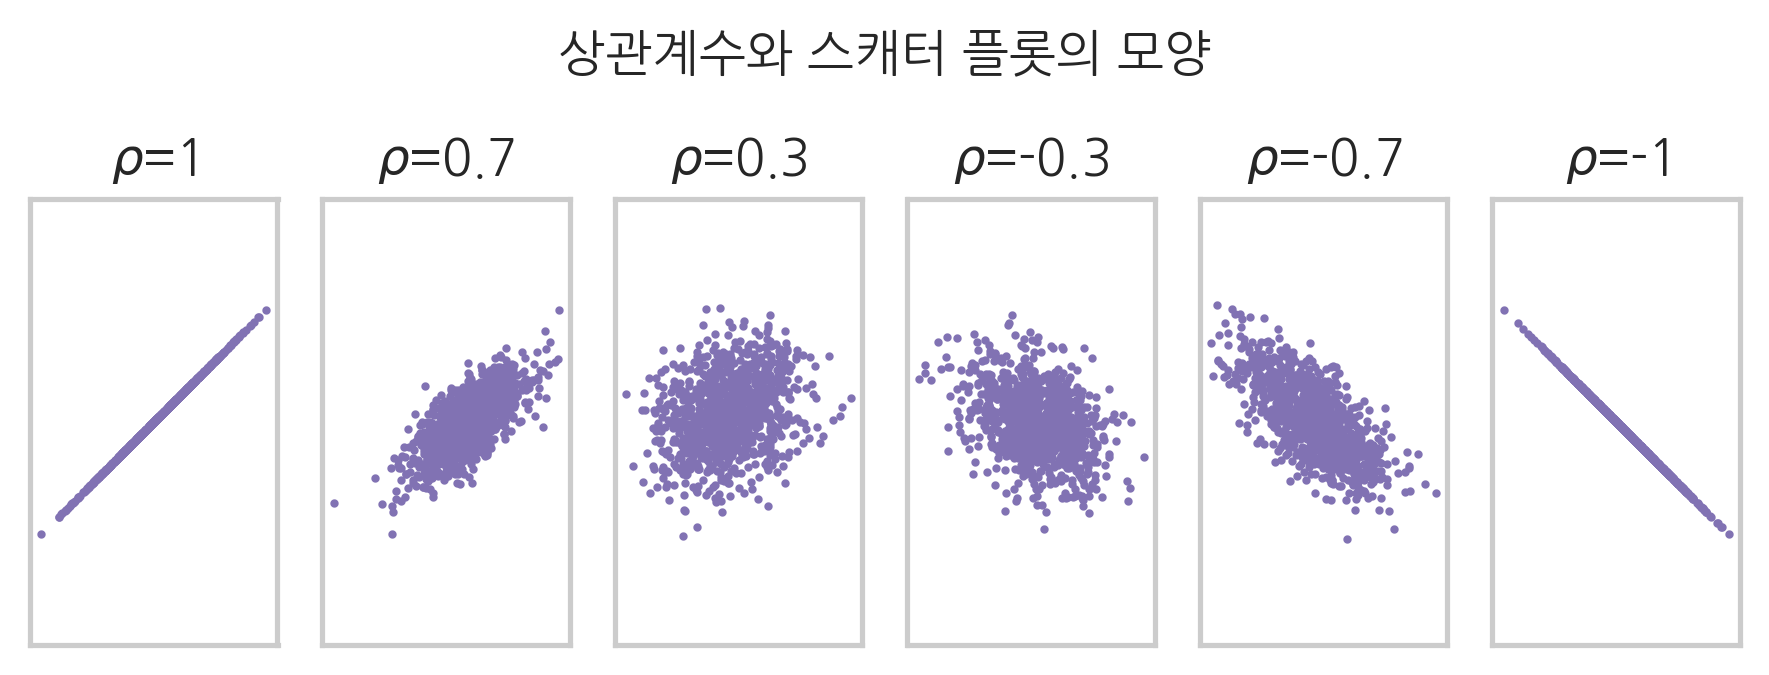

In [4]:
np.random.seed(0)
corrs = [1, 0.7, 0.3, 0. -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0,0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i+1)
    plt.plot(x, y, 'mo', ms=1)
    plt.axis('equal')
    plt.xticks([]); plt.yticks([])
    plt.title(r'$\rho$={}'.format(r))
plt.suptitle('상관계수와 스캐터 플롯의 모양', y=1.1)
plt.tight_layout()
plt.show()

* 직선모양이 뚜렷할 수록 상관계수의 절댓값이 커지고 원에 가까워질 수록 절댓값이 작아진다.
* 상관계수와 스캐터 플롯의 기울기는 무관하다.

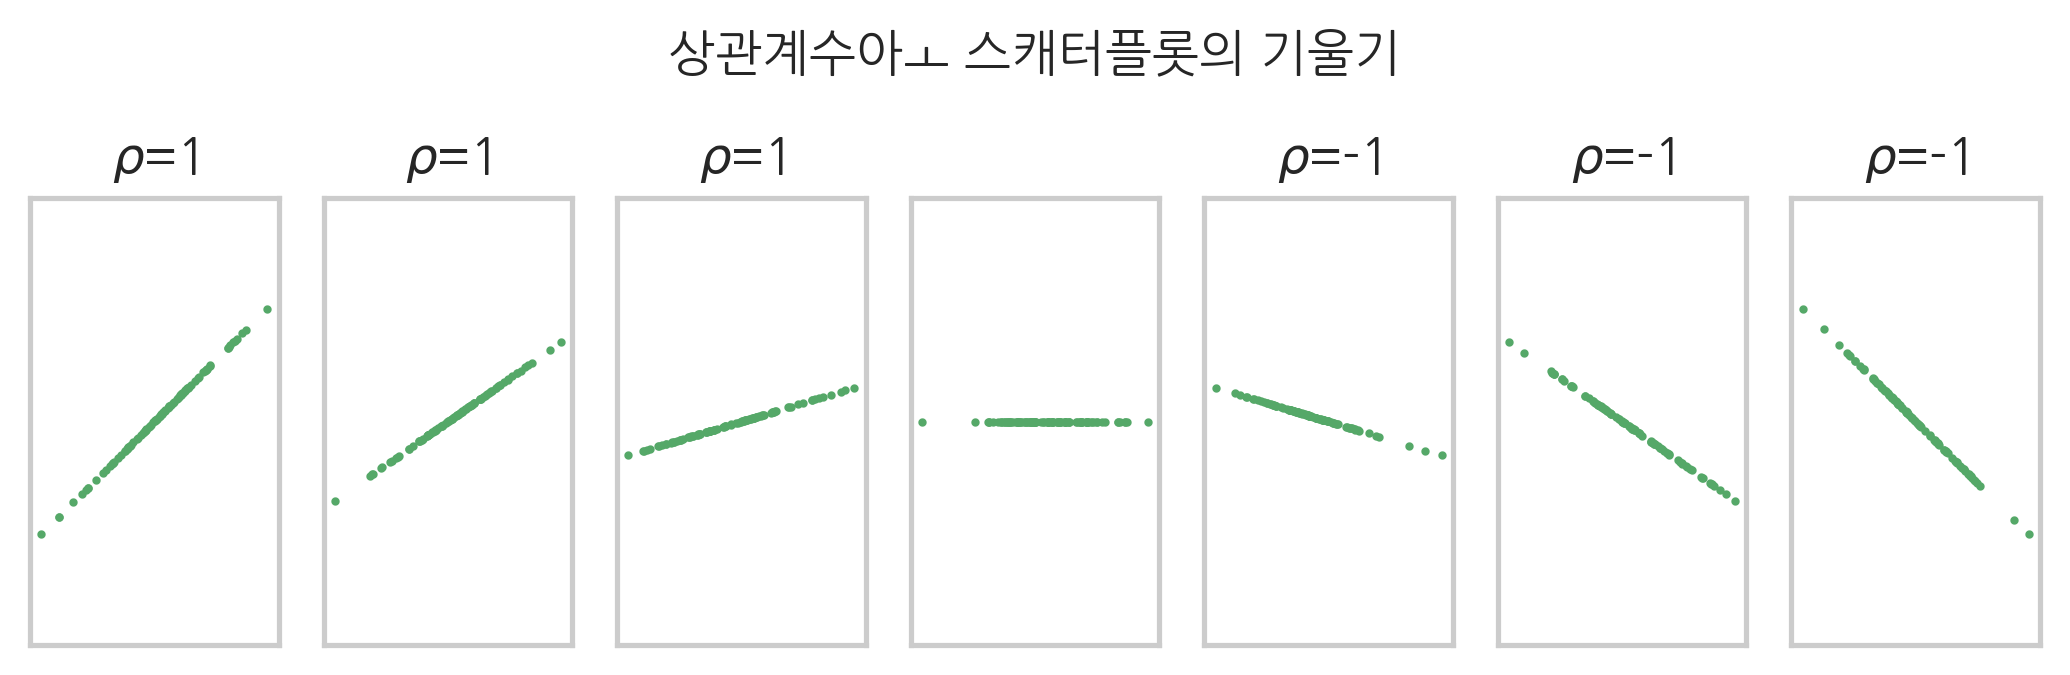

In [8]:
np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i+1)
    x, y = np.random.multivariate_normal([0,0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'go', ms=1)
    plt.axis('equal')
    plt.xticks([]); plt.yticks([])
    if s > 0:
        plt.title(r'$\rho$=1')
    if s < 0:
        plt.title(r'$\rho$=-1')
plt.suptitle('상관계수아ㅗ 스캐터플롯의 기울기', y=1.1)
plt.tight_layout()
plt.show()

In [7]:
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
list(enumerate(slope))

[(0, 1), (1, 0.7), (2, 0.3), (3, 0), (4, -0.3), (5, -0.7), (6, -1)]

[연습문제 7.5.2]

(1) 원소의 갯수가 10개인 두 개의 무작위 숫자 벡터를 생성하라. 이 두 벡터가 두 개의 확률변수에서 나온 데이터라고 가정하면 두 확률변수는 독립이어야 한다.

(2) 두 데이터 집합의 표본상관계수를 계산하라. 독립인 확률변수의 상관계수는 0이어야 한다. 표본상관계수의 값도 0인가?

(3) 원소의 갯수를 10,000개로 다시 무작위 숫자 벡터를 생성하고 표본상관계수를 계산하라. 아까와 어떻게 달라졌는가?

(4) 표본상관계수가 이론적 상관계수와 같지 않은 이유는 무엇인가?

In [20]:
np.random.seed(1)
x1 = np.random.normal(size=10)
x2 = np.random.normal(size=10)
sp.stats.pearsonr(x1, x2)[0]

0.6556177144470318

In [21]:
x3 = np.random.normal(size=10000)
x4 = np.random.normal(size=10000)
sp.stats.pearsonr(x3, x4)[0]

0.015381031029658956

비선형 상관관계
- 피어슨 상관계수는 비선형관계를 표현하지 못한다

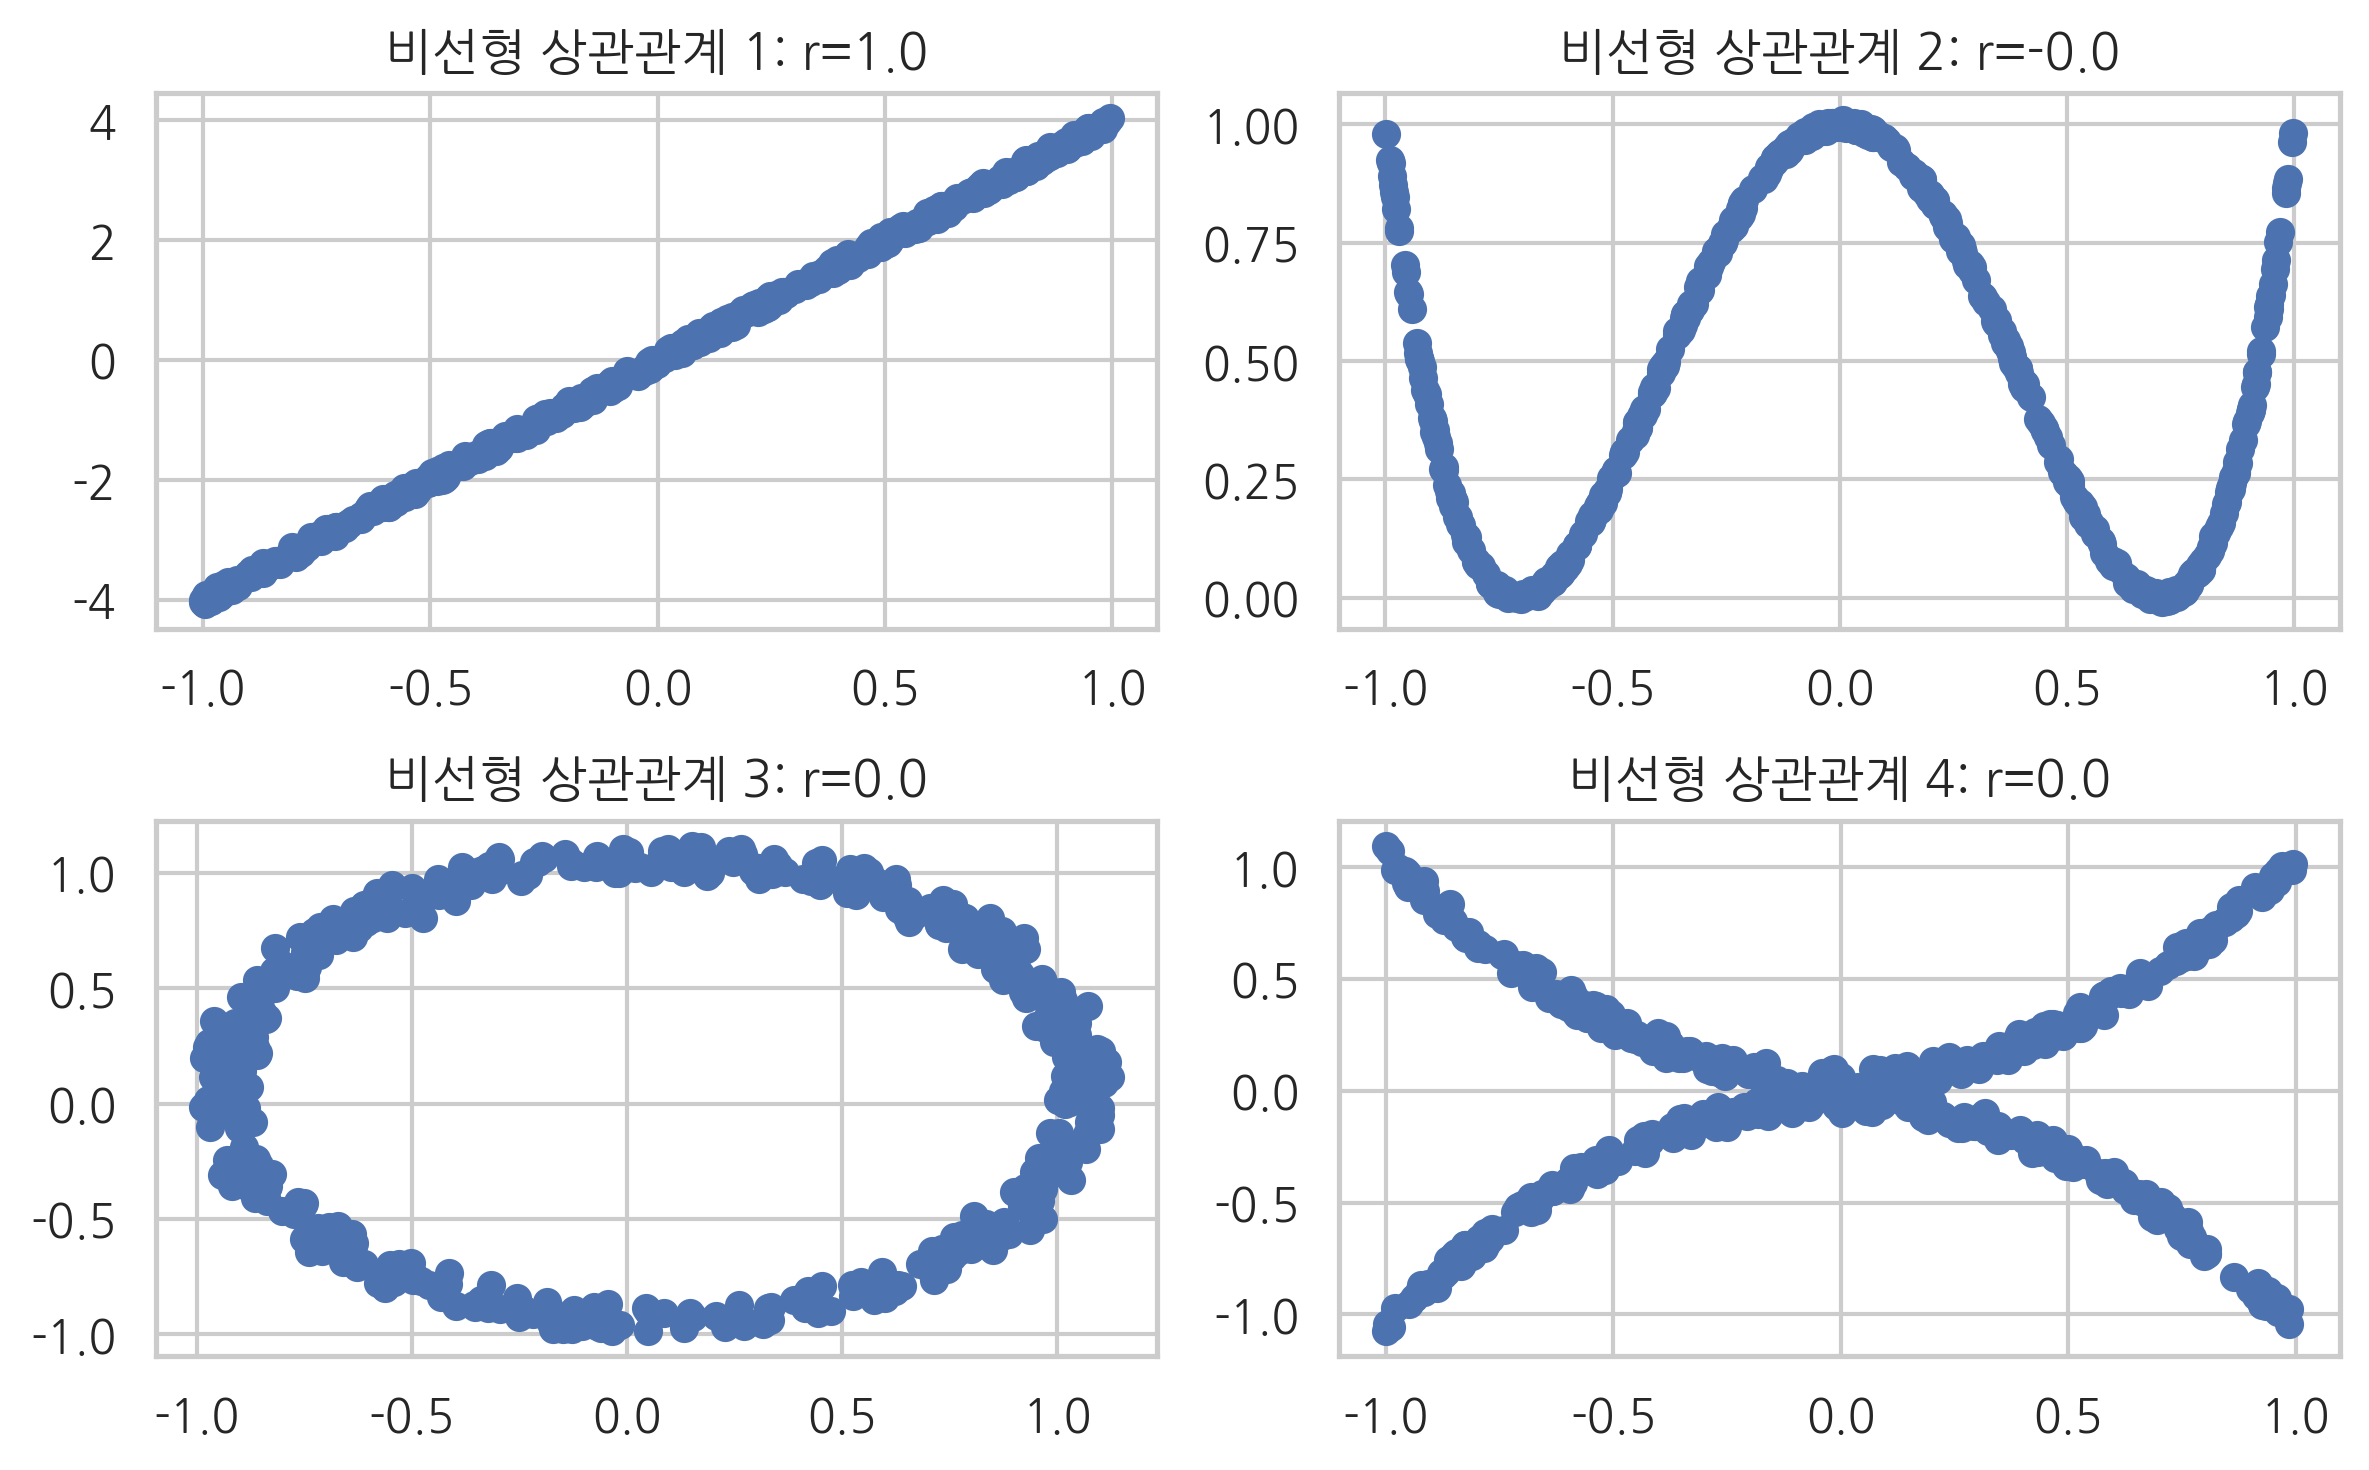

In [25]:
n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1*2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r'비선형 상관관계 1: r={:3.1f}'.format(r1))

plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-0.1, 0.1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r'비선형 상관관계 2: r={:3.1f}'.format(r2))

plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3*np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3*np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r'비선형 상관관계 3: r={:3.1f}'.format(r3))

plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n))*np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r'비선형 상관관계 4: r={:3.1f}'.format(r4))

plt.tight_layout()
plt.show()

앤스콤 데이터
- 4종류의 데이터셋 모두 상관관계가 0.816

In [26]:
data = sm.datasets.get_rdataset('anscombe')
df = data.data
df[['x1', 'y1', 'x2', 'y2', 'x3', 'y3', 'x4', 'y4']]

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


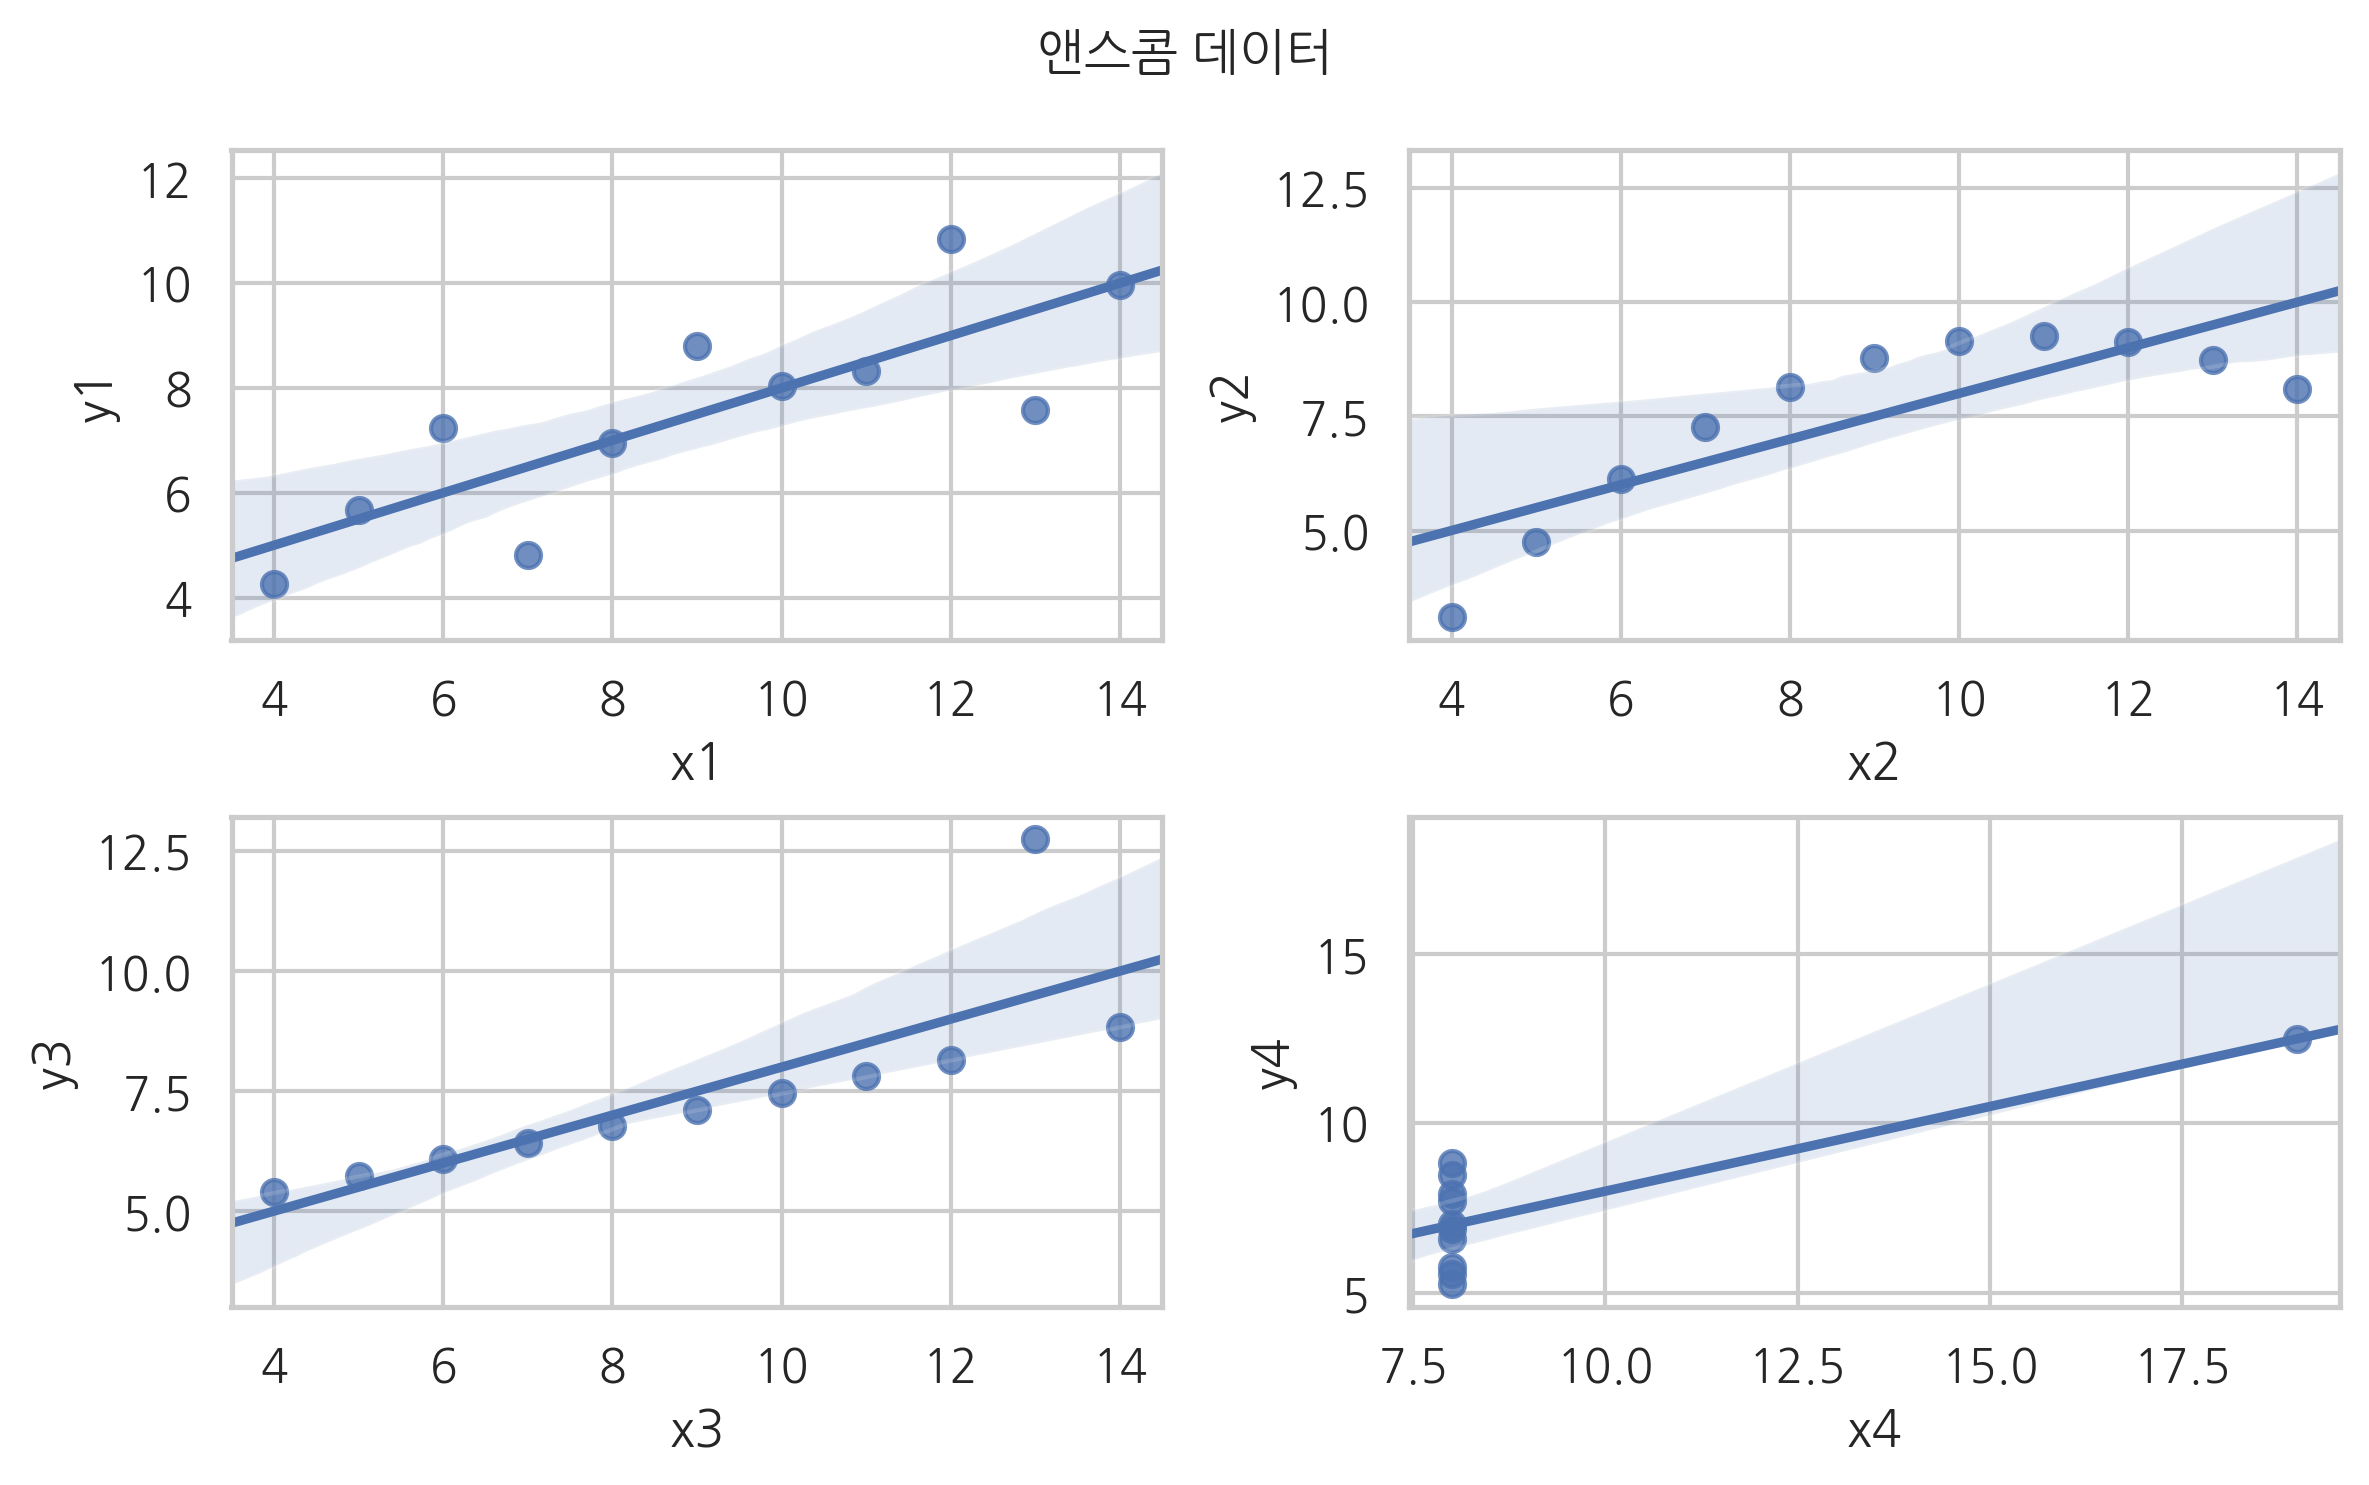

In [28]:
plt.subplot(221)
sns.regplot(x='x1', y='y1', data=df)
plt.subplot(222)
sns.regplot(x='x2', y='y2', data=df)
plt.subplot(223)
sns.regplot(x='x3', y='y3', data=df)
plt.subplot(224)
sns.regplot(x='x4', y='y4', data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle('앤스콤 데이터')
plt.show()

[연습문제7.5.4]
붓꽃 데이터 4가지 확률변수의 표본공분산행렬

In [30]:
X = load_iris().data
x1 = X[:, 0] # 꽃받침 길이
x2 = X[:, 1] # 꽃받침 폭
x3 = X[:, 2] # 꽃잎 길이
x4 = X[:, 3] # 꽃잎 폭

In [32]:
m1 = np.mean(x1)
m2 = np.mean(x2)
m3 = np.mean(x3)
m4 = np.mean(x4)

In [44]:
N = len(X[0])

In [45]:
S = 1/N * ((x1-m1) @ (x1-m1).T + (x2-m2) @ (x2-m2).T + (x3-m3) @ (x3-m3).T + (x4-m4) @ (x4-m4).T)
S

170.34265

In [46]:
N, M = X.shape
N, M

(150, 4)

In [50]:
xbar = 1/N * (np.ones((1, N)) @ X).T
xbar

array([[5.84333333],
       [3.05733333],
       [3.758     ],
       [1.19933333]])

In [51]:
X0 = X- np.ones((N, 1)) @ xbar.T
X0

array([[-7.43333333e-01,  4.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01, -5.73333333e-02, -2.35800000e+00,
        -9.99333333e-01],
       [-1.14333333e+00,  1.42666667e-01, -2.45800000e+00,
        -9.99333333e-01],
       [-1.24333333e+00,  4.26666667e-02, -2.25800000e+00,
        -9.99333333e-01],
       [-8.43333333e-01,  5.42666667e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-4.43333333e-01,  8.42666667e-01, -2.05800000e+00,
        -7.99333333e-01],
       [-1.24333333e+00,  3.42666667e-01, -2.35800000e+00,
        -8.99333333e-01],
       [-8.43333333e-01,  3.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.44333333e+00, -1.57333333e-01, -2.35800000e+00,
        -9.99333333e-01],
       [-9.43333333e-01,  4.26666667e-02, -2.25800000e+00,
        -1.09933333e+00],
       [-4.43333333e-01,  6.42666667e-01, -2.25800000e+00,
        -9.99333333e-01],
       [-1.04333333e+00,  3.42666667e-01, -2.15800000e+00,
      

In [52]:
S = 1/N * X0.T @ X0
S

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

### 8.1 사이파이를 이용한 확률분포 분석
`scipy.stats`: 확률분포 분석 기능 제공

* 이산확률변수
    - 베르누이분포: `bernoulli`
    - 이항분포: `binom`
    - 다항분포: `multinomial`
* 연속확률변수
    - 균일분포: `uniform`
    - 정규분포: `norm`
    - 베타분포: `beta`
    - 감마분포: `gamma`
    - 스튜던트 t분포: `t`
    - 카이제곱분포: `chi2`
    - F분포: `f`
    - 디리클리분포: `dirichlet`
    - 다변수정규분포: `multivariate_normal`

* 모수
    - loc: 분포의 기댓값
    - scale: 분포의 표준편차
* 확률분포 메서드
    - 확률질량함수: `pmf'
    - 확률밀도함수: `pdf`
    - 누적분포함수: `cdf`
    - 누적분포함수의 역함수: `ppf`
    - 생존함수: `sf`: 1 - cdf
    - 생존함수의 역함수: `isf`
    - 랜덤표본생성: `rvs`
        - size, random_state

In [56]:
# 기댓값이 1이고 표준편차가 2인 정규분포 객체 생성
rv = sp.stats.norm(loc=1, scale=2)

<function matplotlib.pyplot.show(*args, **kw)>

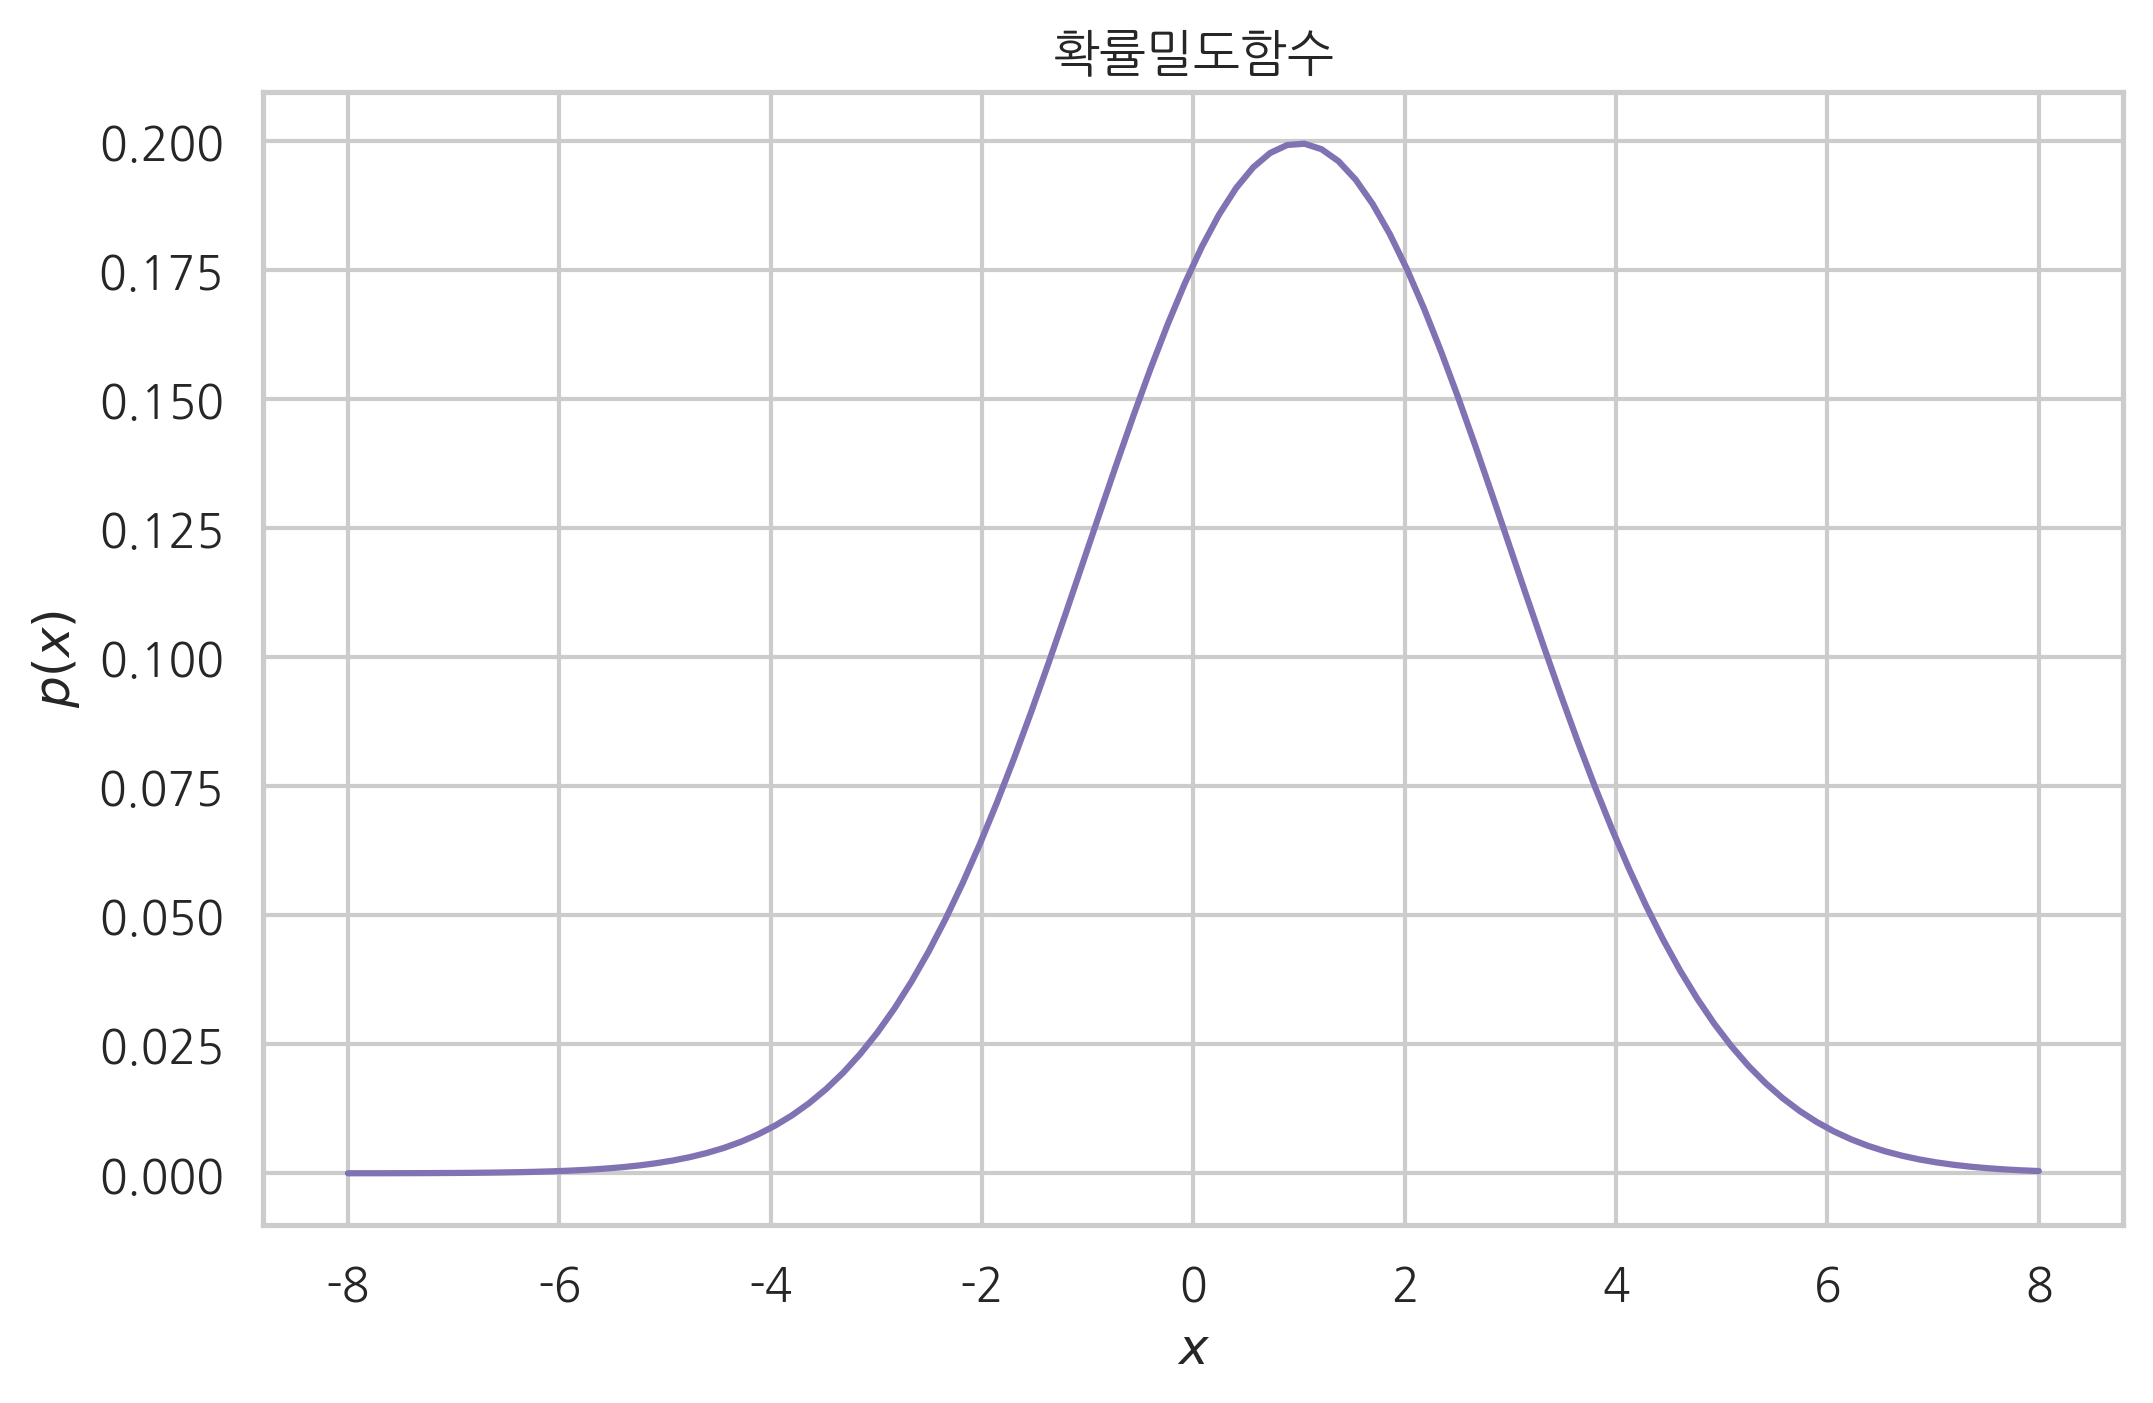

In [57]:
# 확률밀도함수 (pdf)
xx = np.linspace(-8, 8, 100)
pdf = rv.pdf(xx)
plt.plot(xx, pdf, 'm')
plt.title('확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show

[연습문제8.1.1]
E = 0, s = 0.1 정규분포객체, pdf그리기/ pdf의 최댓값

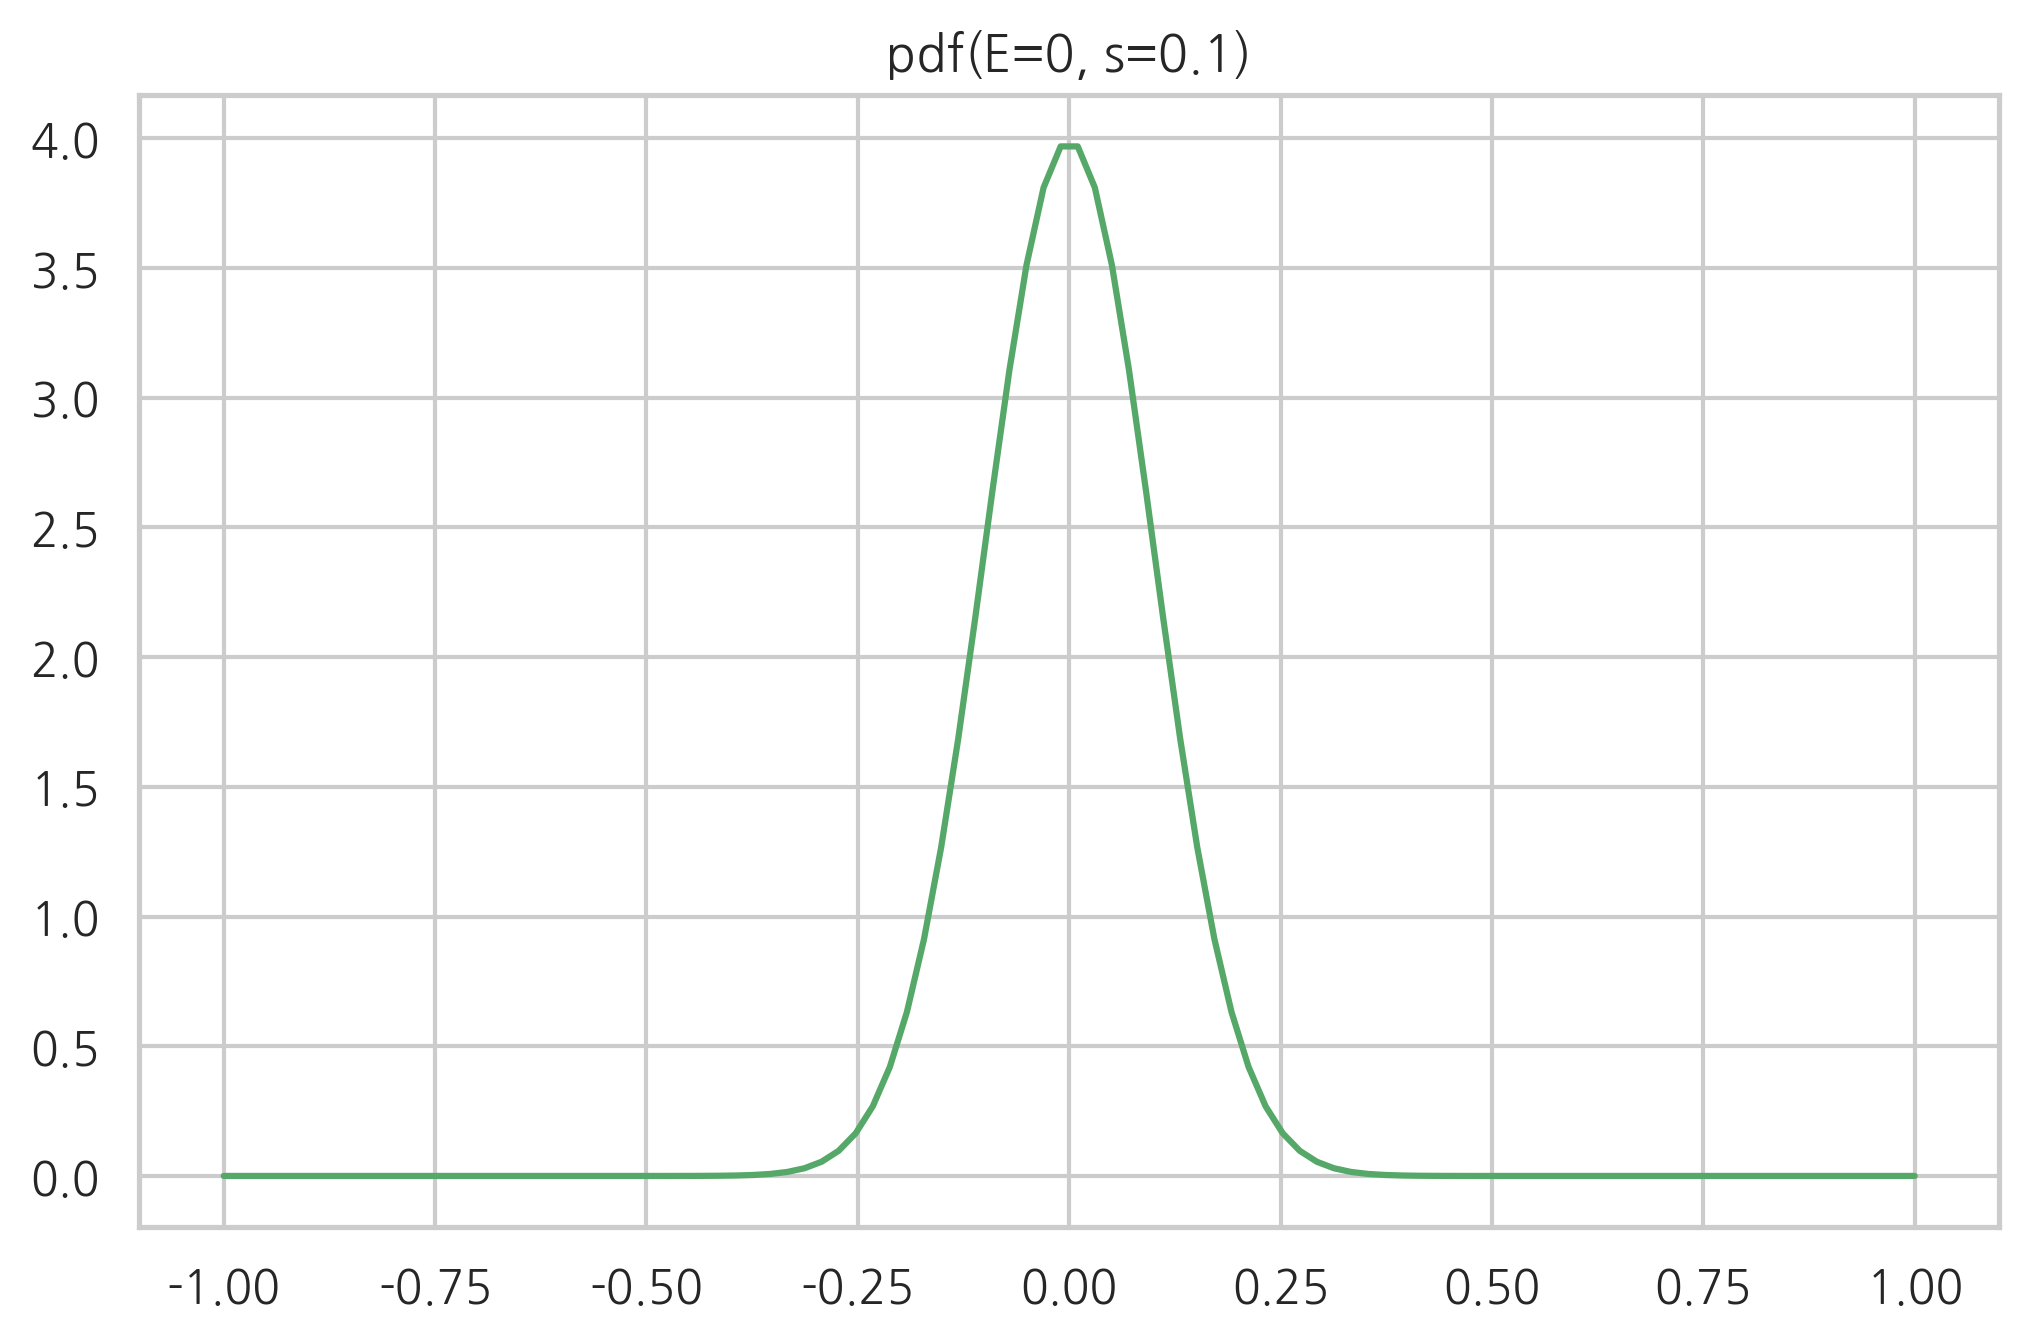

In [58]:
rv1 = sp.stats.norm(loc=0, scale=0.1)
xx = np.linspace(-1, 1, 100)
pdf1 = rv1.pdf(xx)
plt.plot(xx, pdf1, 'g')
plt.title('pdf(E=0, s=0.1)')
plt.show()

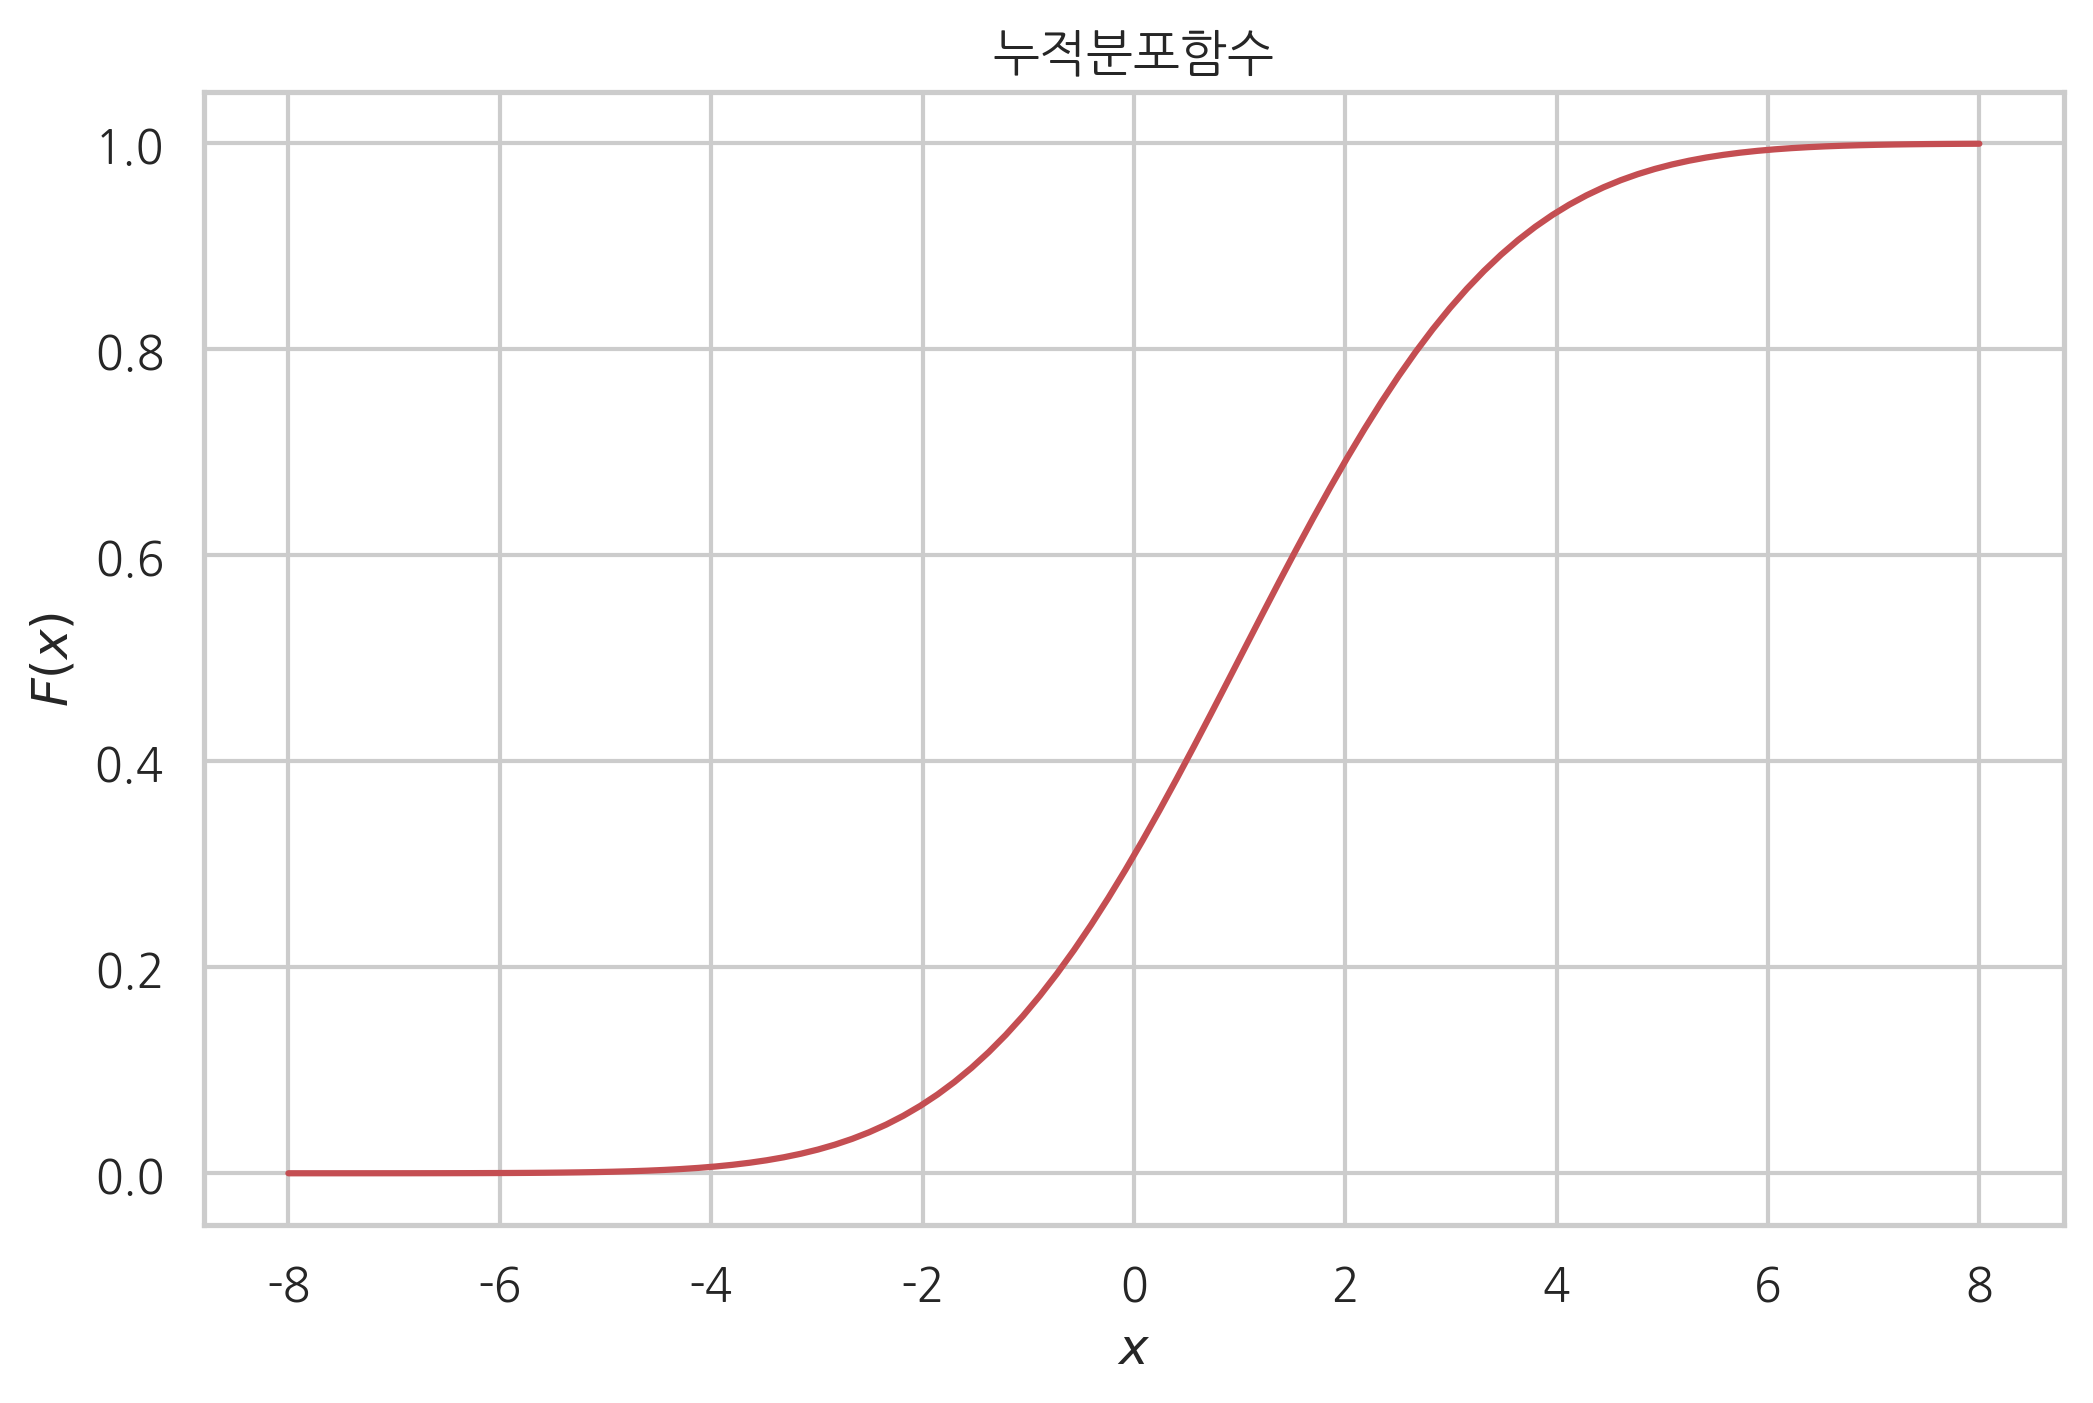

In [59]:
# 누적분포함수 (cdf)
xx = np.linspace(-8, 8, 100)
cdf = rv.cdf(xx)
plt.plot(xx, cdf, 'r')
plt.title('누적분포함수')
plt.xlabel('$x$'); plt.ylabel('$F(x)$')
plt.show()

In [60]:
# 무작위 표본 생성
rv.rvs(size=(3, 5), random_state=0)

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

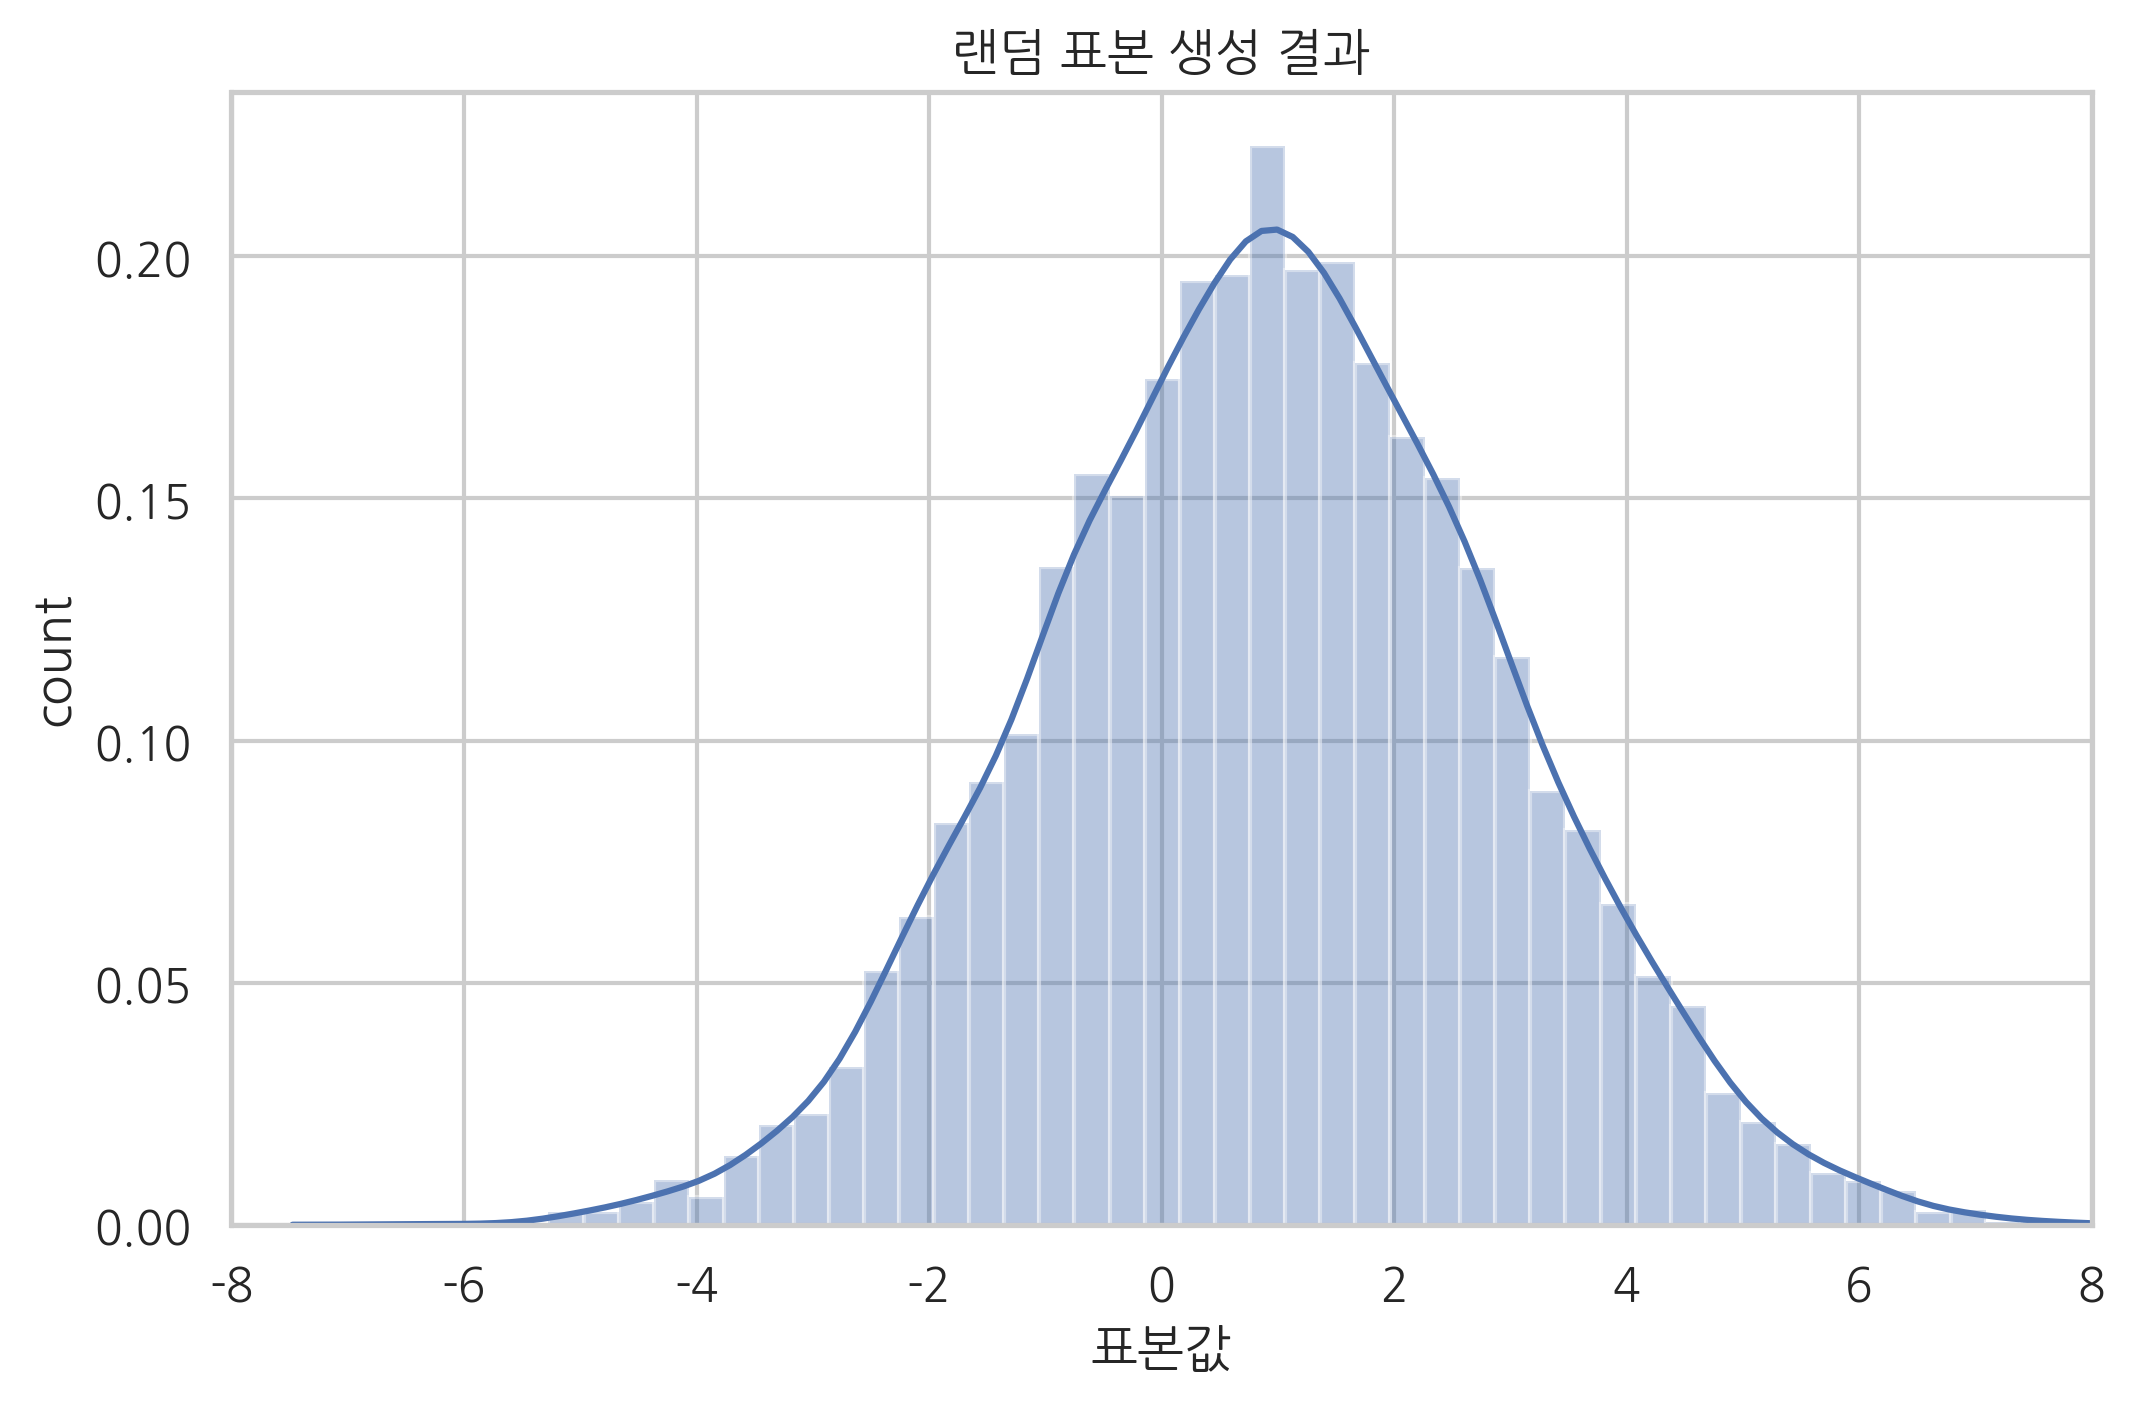

In [62]:
sns.distplot(rv.rvs(size=10000, random_state=0))
plt.title('랜덤 표본 생성 결과')
plt.xlabel('표본값')
plt.ylabel('count')
plt.xlim(-8, 8)
plt.show()

[연습문제 8.1.2]
1000개의 정규분포 표본데이터 생성, 표본평균과 비편향표본분산 계산

인수로 넣은 E=1, s=2와 비슷한지 비교

In [63]:
rd = rv.rvs(size=1000, random_state=1)
print(f'표본평균: {np.mean(rd)}\n비편향표본분산: {np.std(rd, ddof=1)}')

표본평균: 1.0776249523192036
비편향표본분산: 1.9629900083651204


In [ ]:
# 변환확률변수의 시뮬레이션

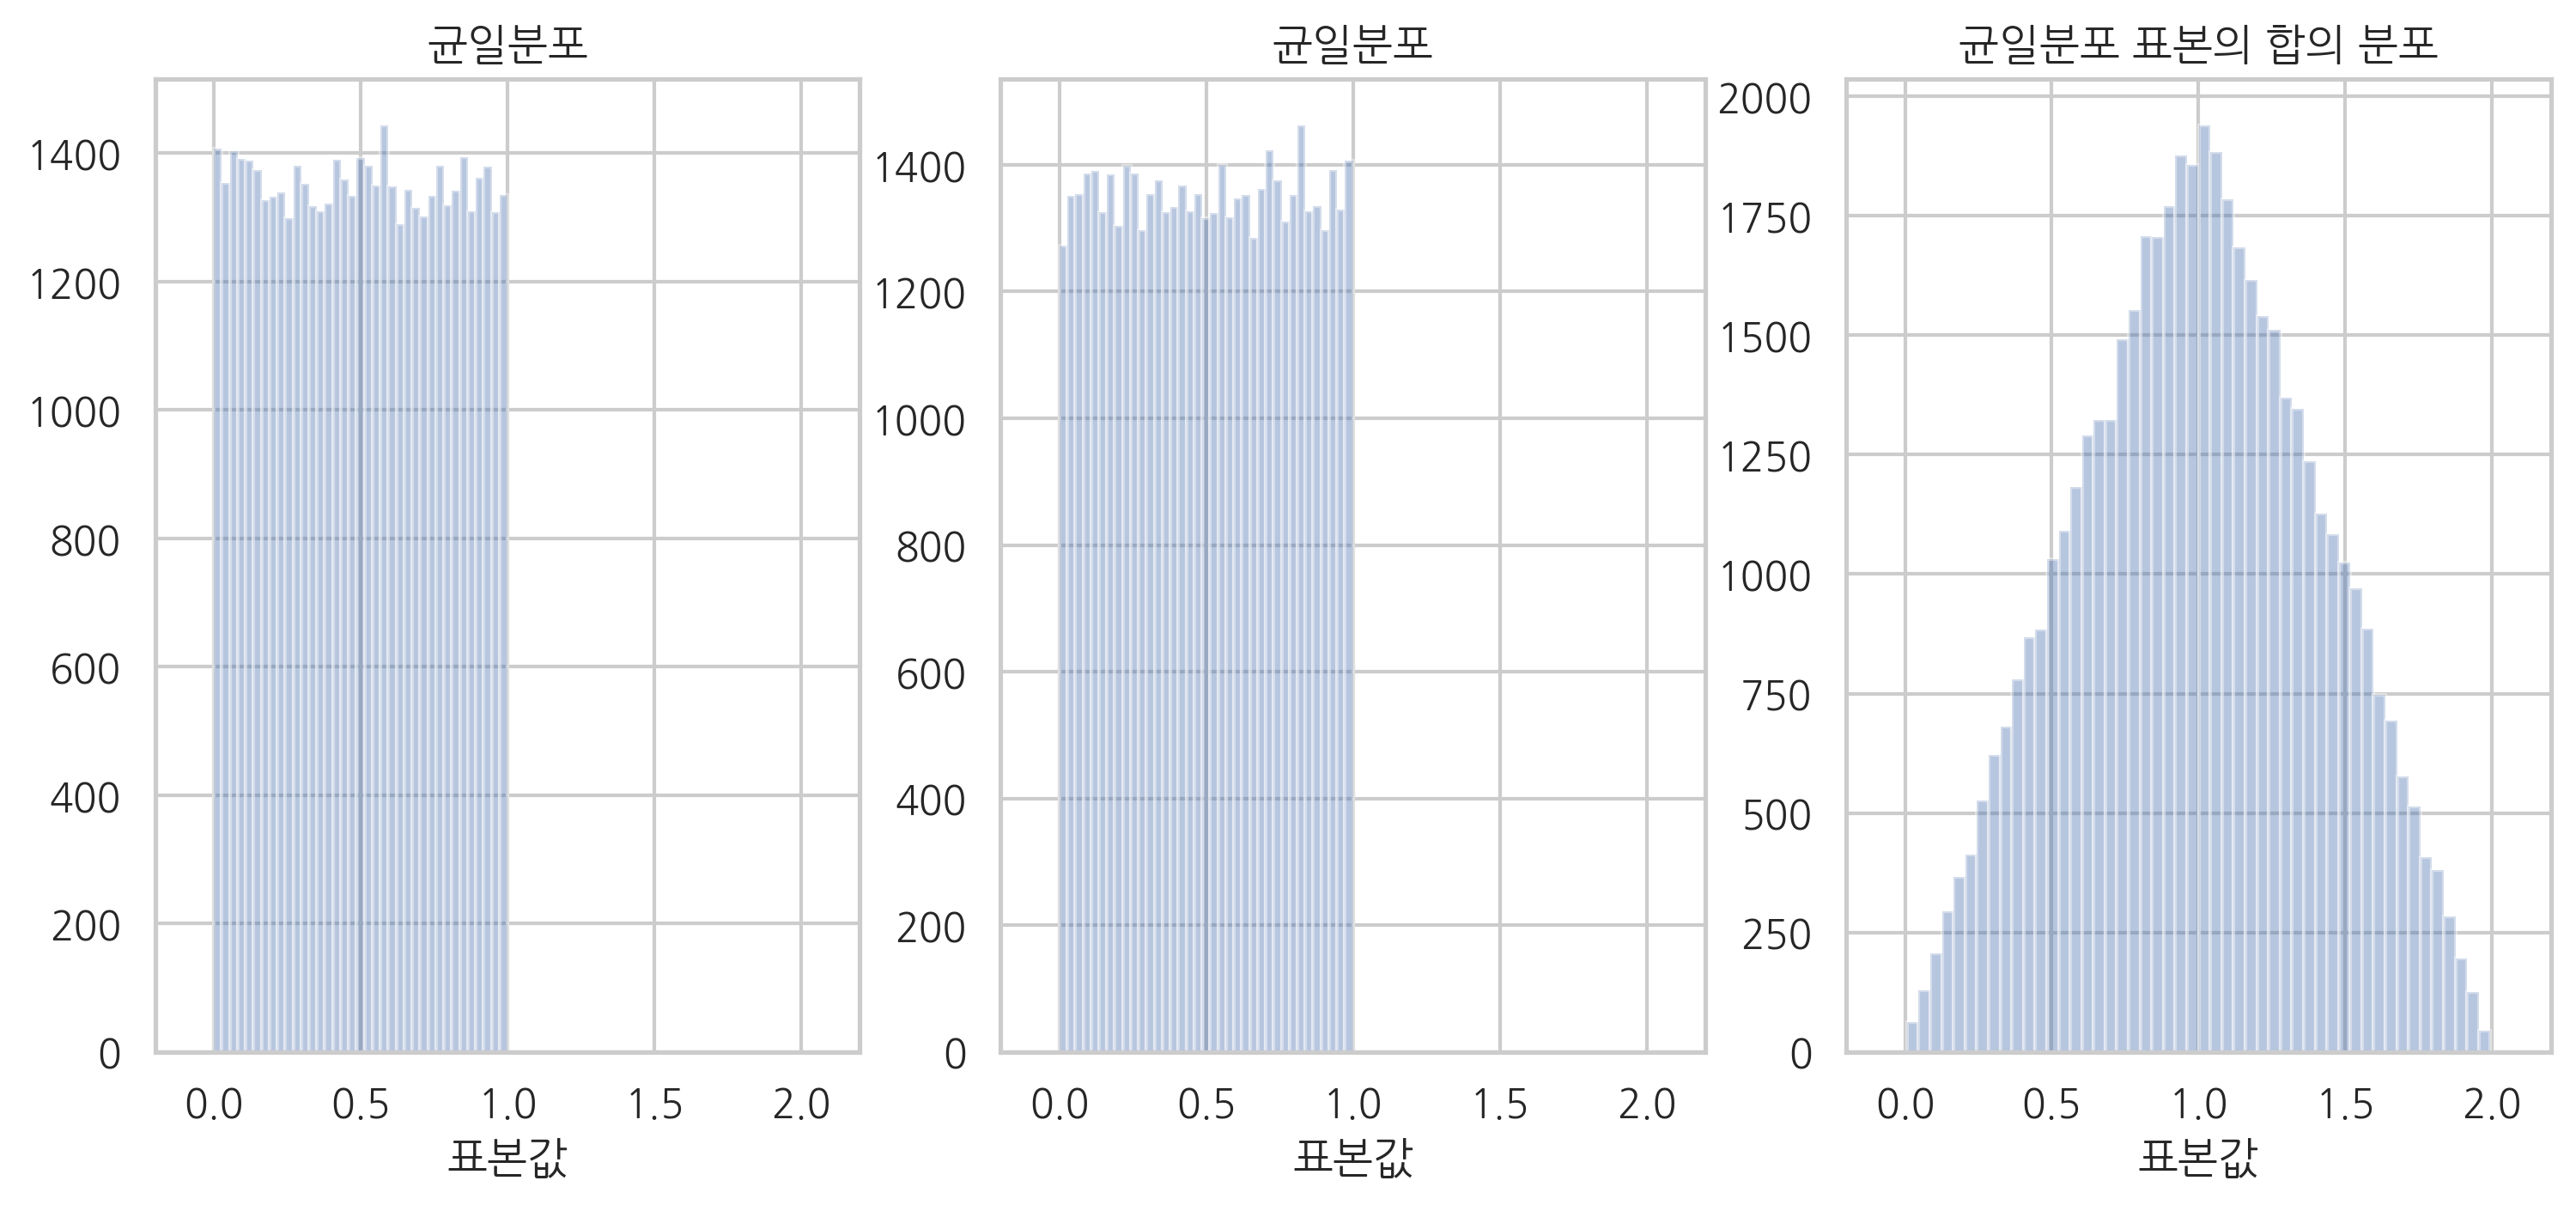

In [65]:
rv1 = sp.stats.uniform()
rv2 = sp.stats.uniform()
np.random.seed(0)
N = 50000
x1 = rv1.rvs(N)
x2 = rv2.rvs(N)
x3 = x1 + x2

plt.figure(figsize=(12, 5))
plt.subplot(131)
sns.distplot(x1, kde=False)
plt.title('균일분포')
plt.xlabel('표본값')
plt.xlim(-0.2, 2.2)

plt.subplot(132)
sns.distplot(x2, kde=False)
plt.title('균일분포')
plt.xlabel('표본값')
plt.xlim(-0.2, 2.2)

plt.subplot(133)
sns.distplot(x3, kde=False)
plt.title('균일분포 표본의 합의 분포')
plt.xlabel('표본값')
plt.xlim(-0.2, 2.2)

plt.show()

[연습문제8.1.3]
10개의 표본값 생성, 그 합의 분포모양, 1000번의 시뮬레이션

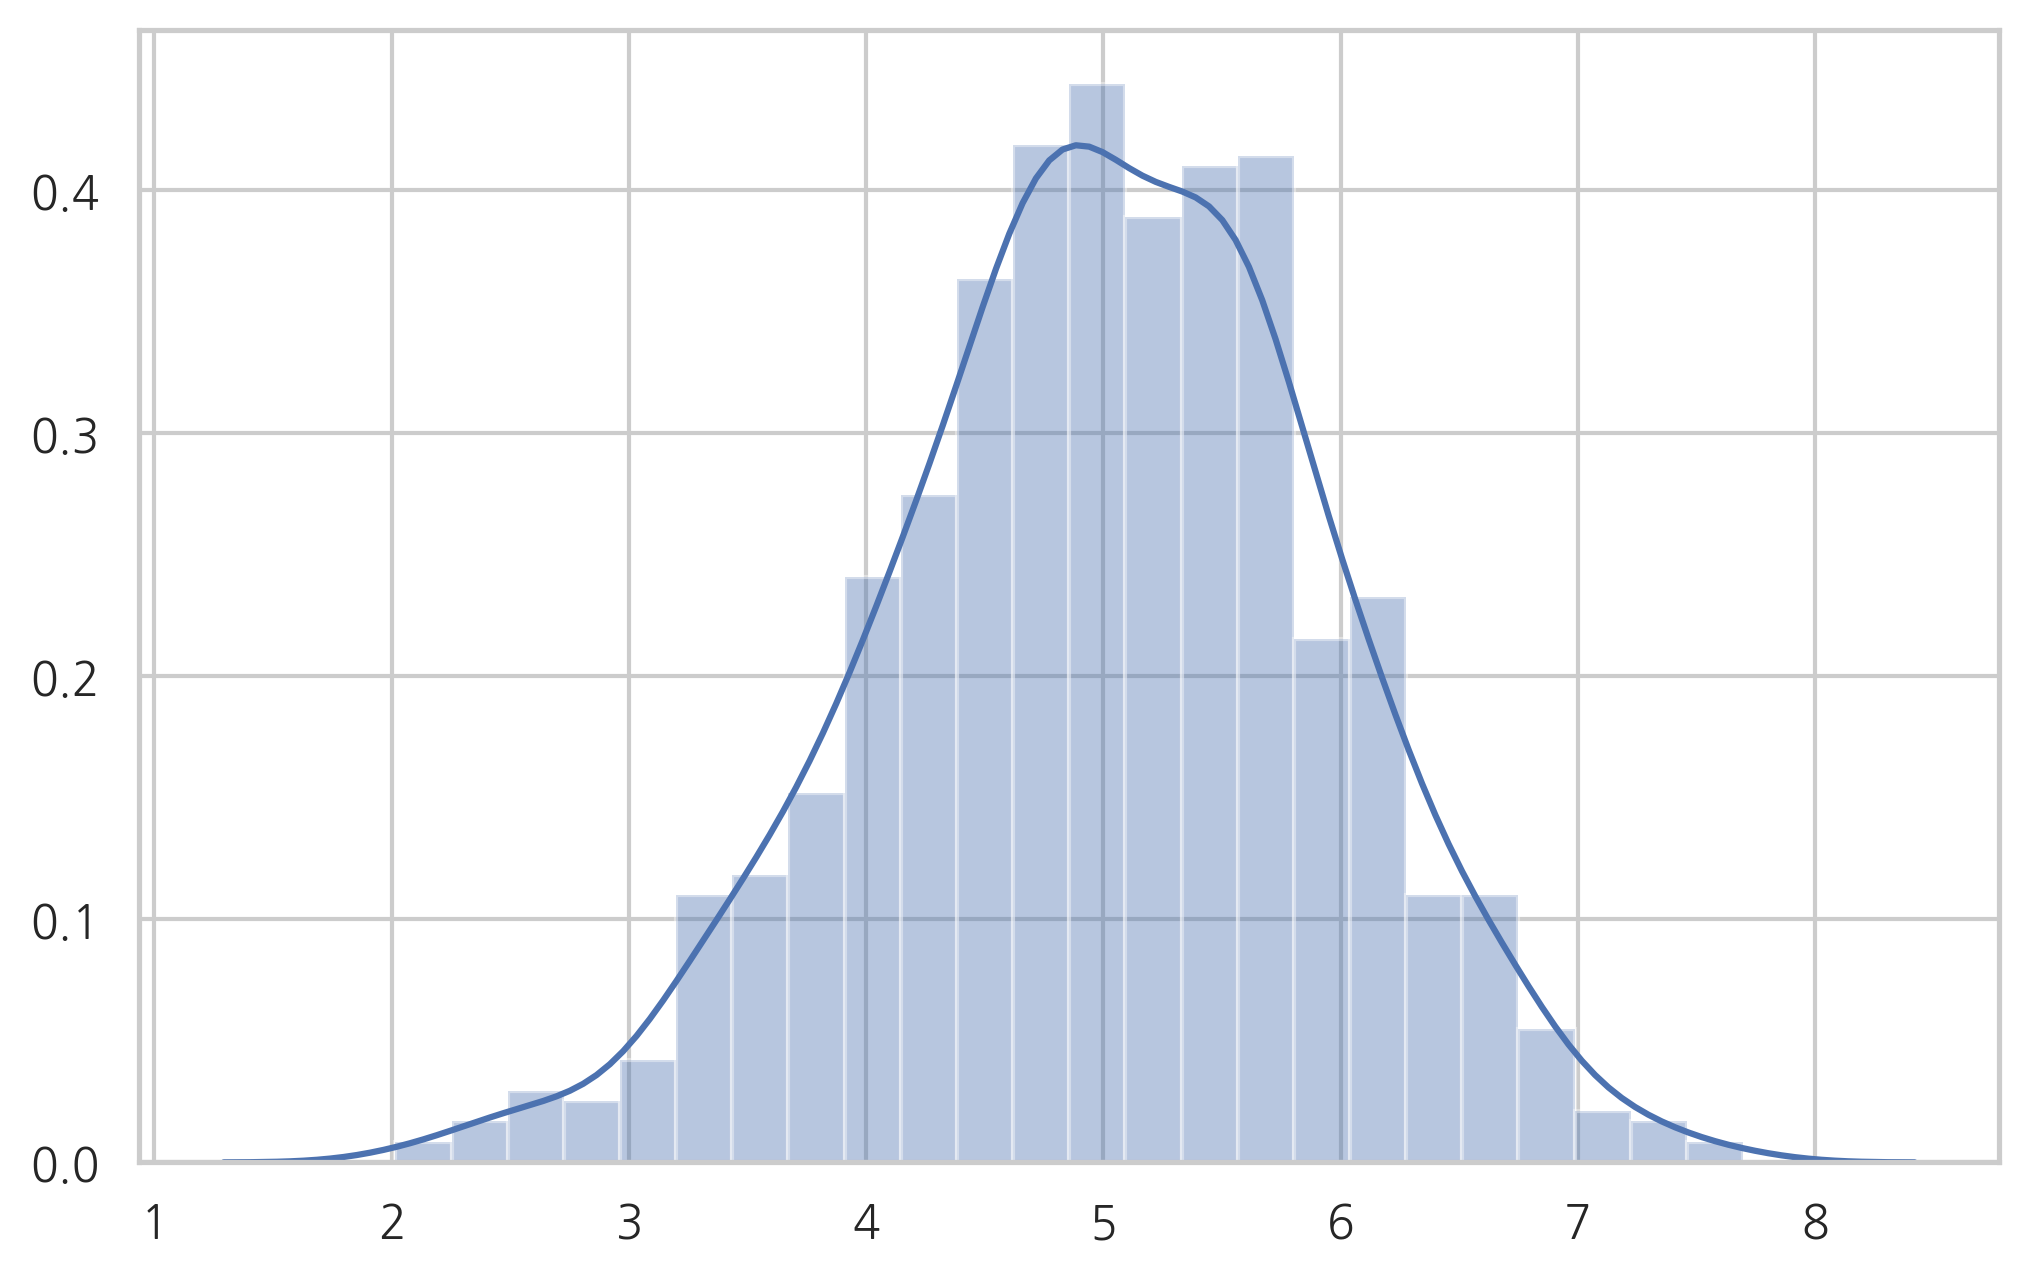

In [80]:
y = np.zeros(1000)
for i in range(10):
    x = sp.stats.uniform().rvs(1000)
    y += x
sns.distplot(y)
plt.show()

### 8.2 베르누이분포와 이항분포
- scipy.stats.bernoulli(p)
    - p = $\mu$

In [81]:
mu = 0.6
rv = sp.stats.bernoulli(mu)
type(rv)

scipy.stats._distn_infrastructure.rv_frozen

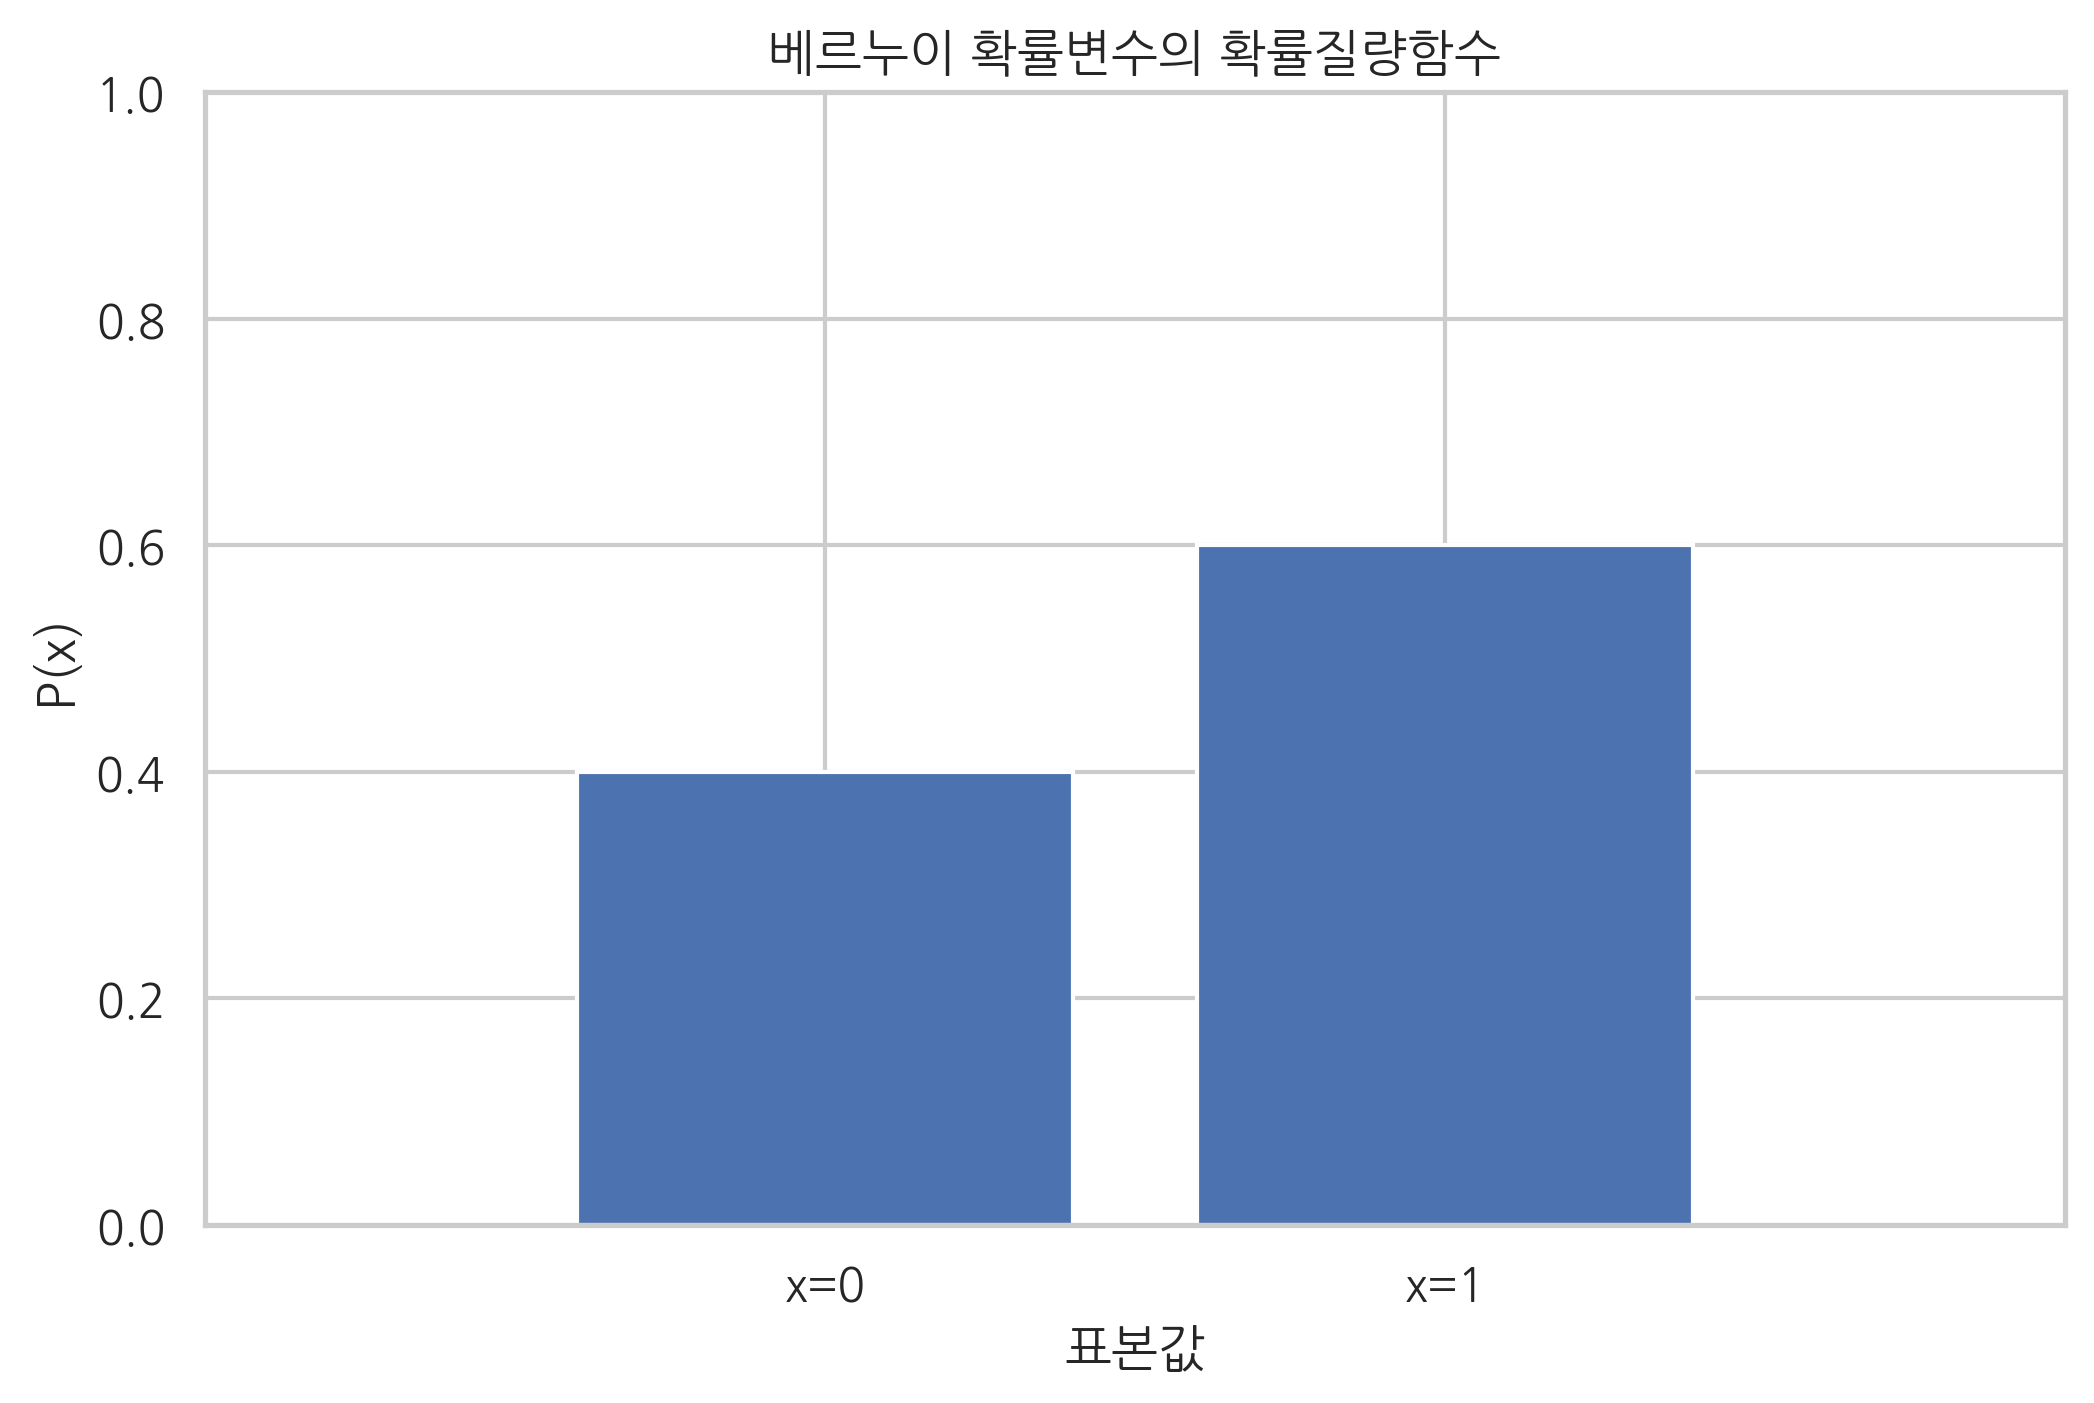

In [83]:
xx = [0, 1]
plt.bar(xx, rv.pmf(xx))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0,1], ['x=0', 'x=1'])
plt.xlabel('표본값')
plt.ylabel('P(x)')
plt.title('베르누이 확률변수의 확률질량함수')
plt.show()

In [84]:
# 시뮬레이션: 확률변수의 표본 생성 (100회)
x = rv.rvs(100, random_state=0)
x

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1])

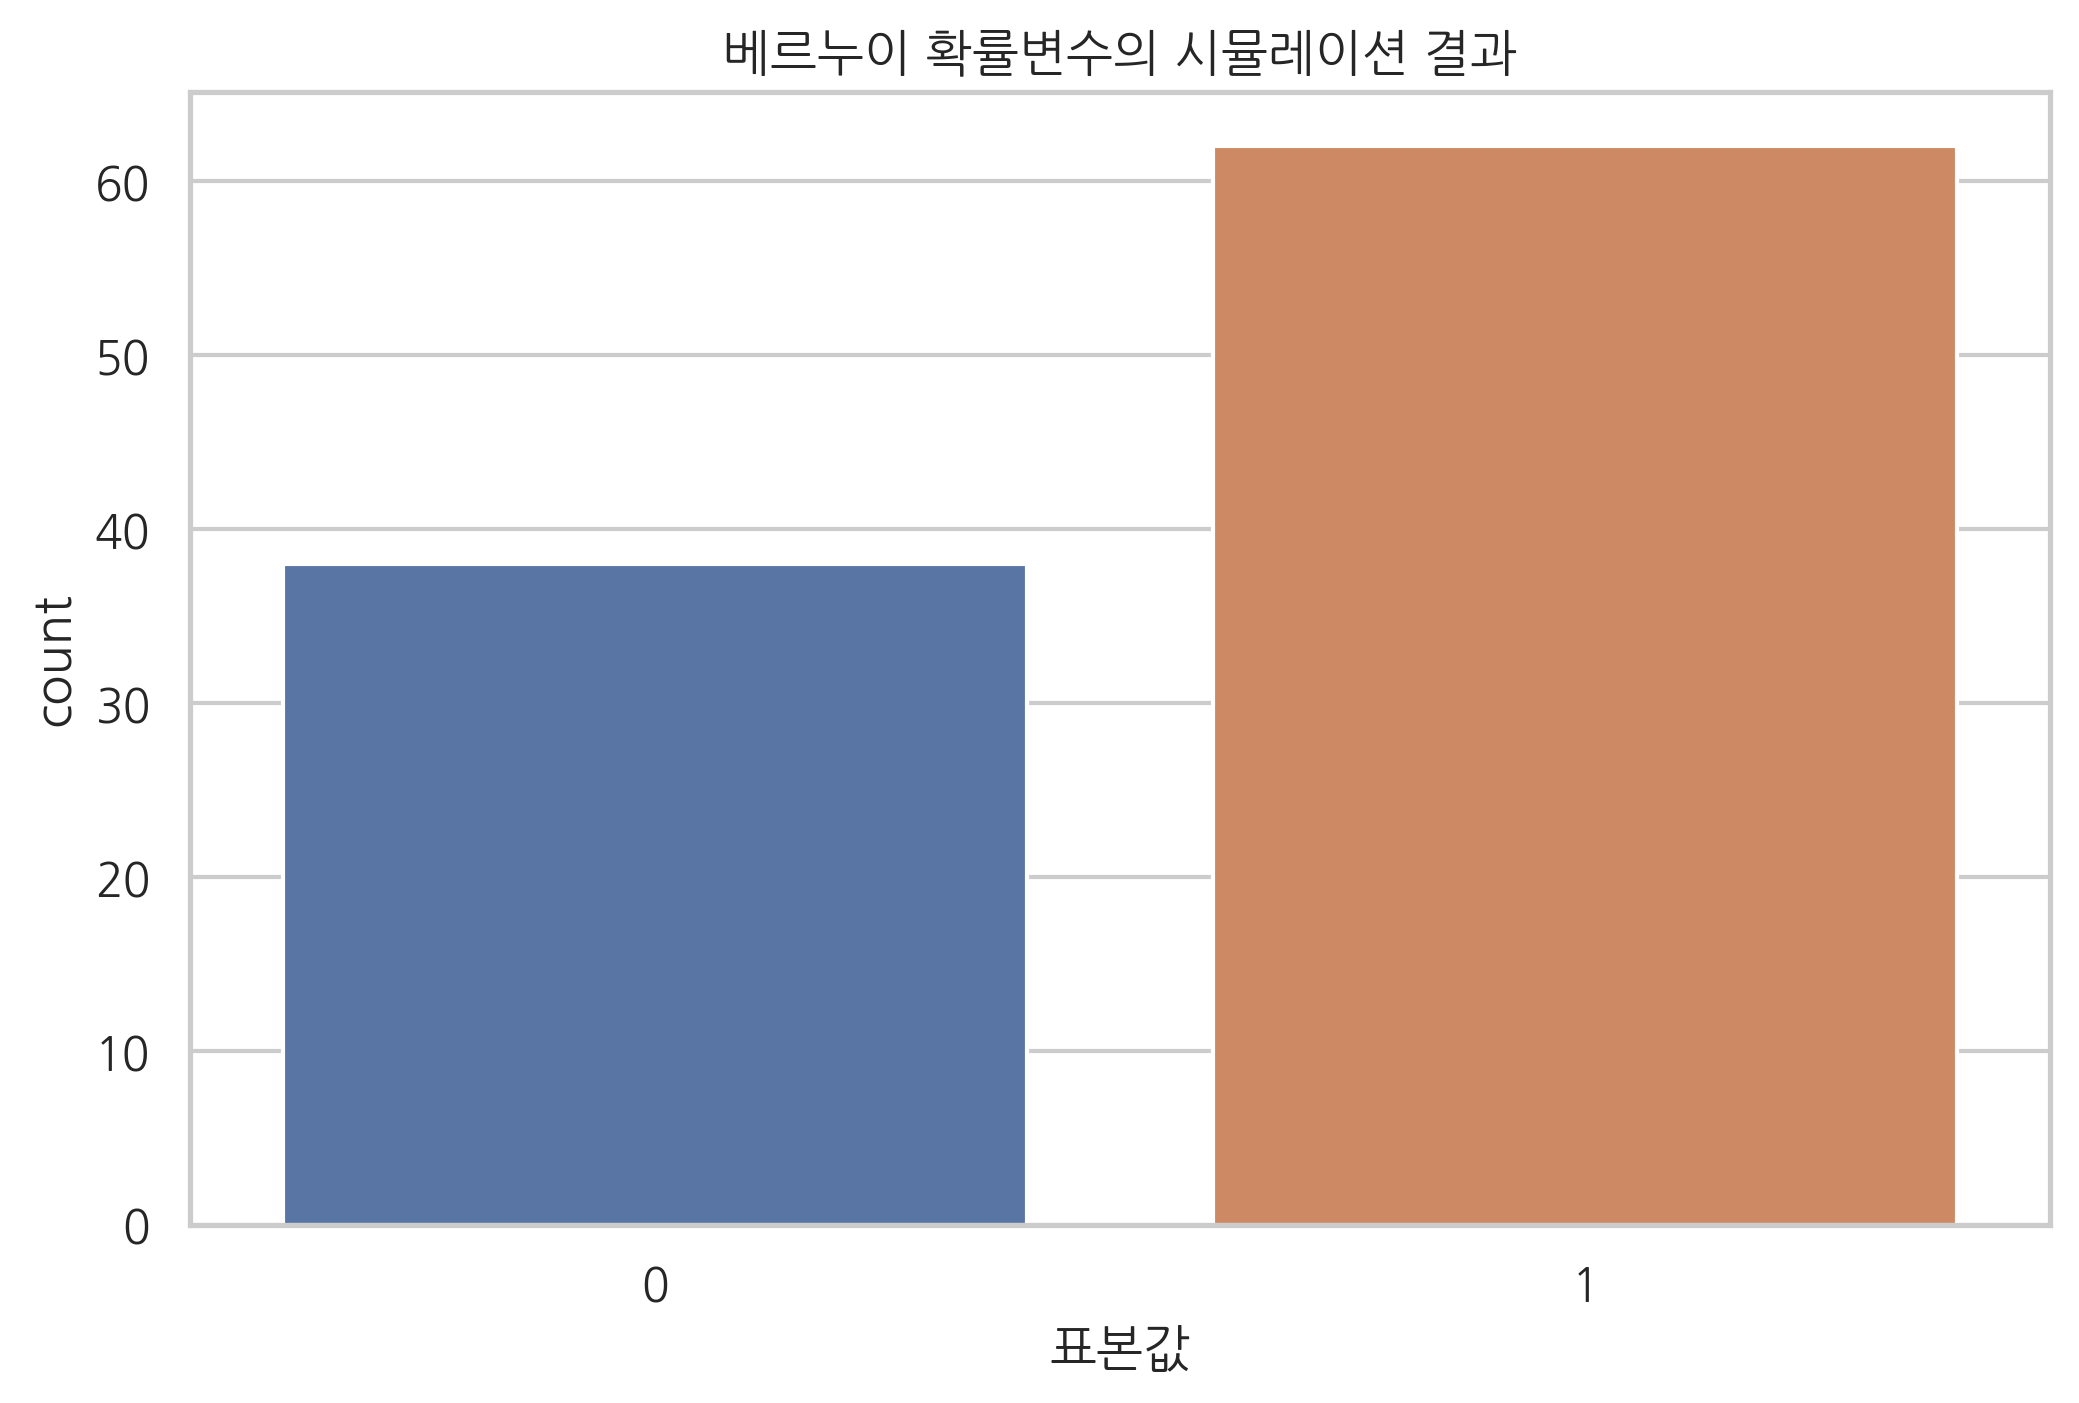

In [85]:
sns.countplot(x)
plt.title('베르누이 확률변수의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.show()

In [86]:
# 이론적인 확률분포와 표본의 확률분포 비교
y = np.bincount(x, minlength=2) / float(len(x))

df = pd.DataFrame({'이론': rv.pmf(xx), '시뮬레이션': y})
df.index = [0, 1]
df

,이론,시뮬레이션
0,0.4,0.38
1,0.6,0.62


In [87]:
df2 = df.stack().reset_index()
df2.columns = ['표본값', '유형', '비율']
df2

,표본값,유형,비율
0,0,이론,0.40
1,0,시뮬레이션,0.38
2,1,이론,0.60
3,1,시뮬레이션,0.62


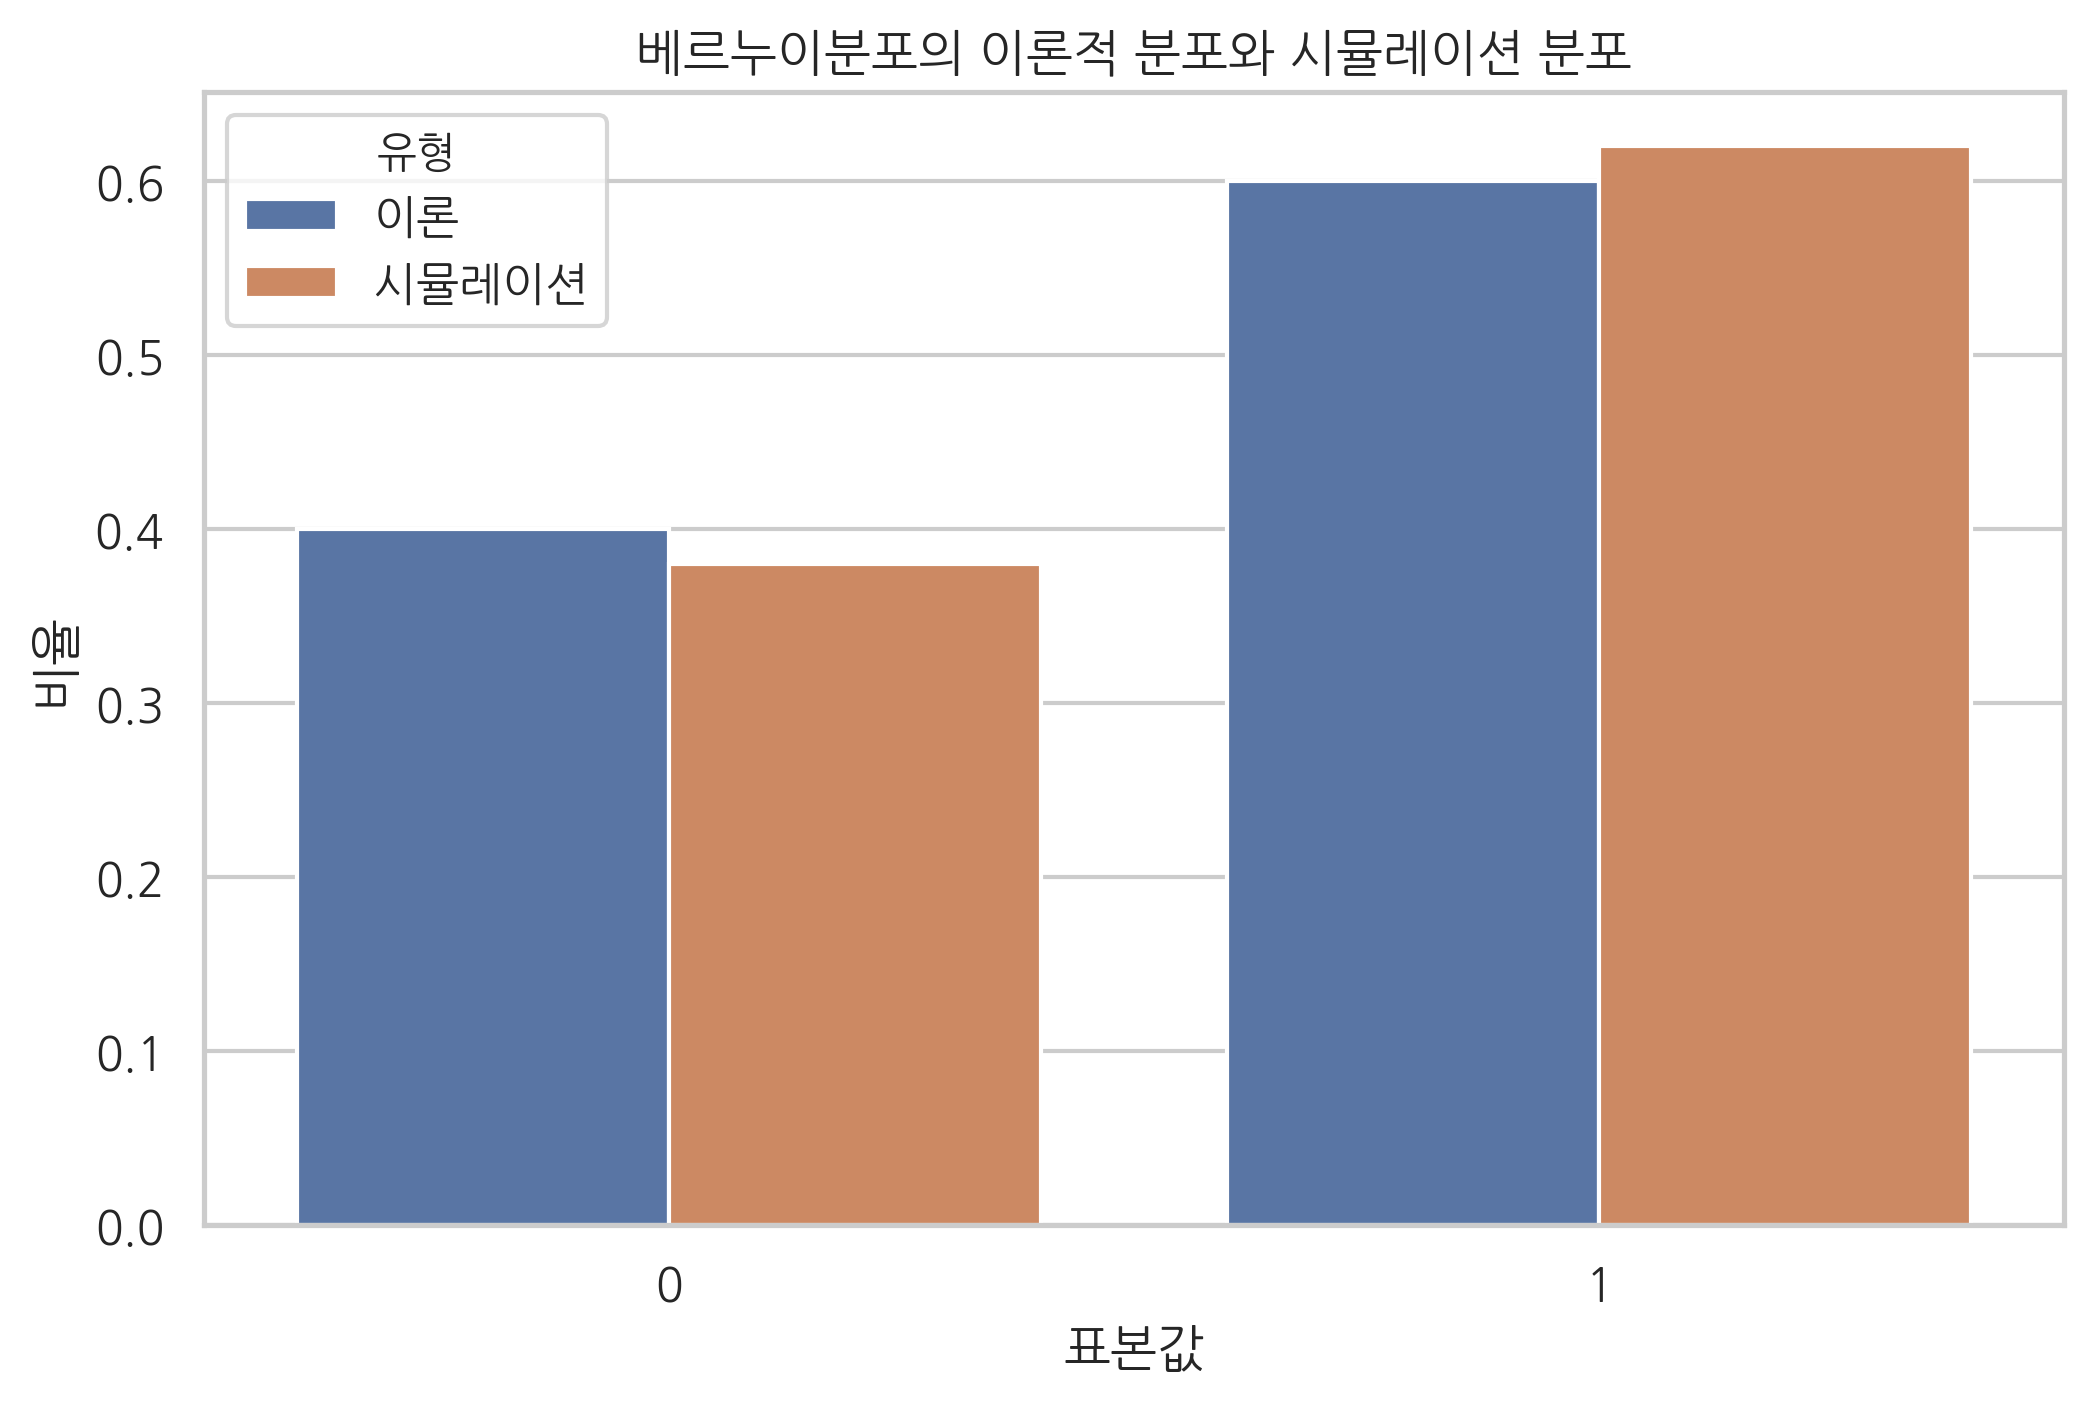

In [88]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df2)
plt.title('베르누이분포의 이론적 분포와 시뮬레이션 분포')
plt.show()

[연습문제 8.2.2]
베르누이 확률분포의 모수가 다음과 같을 경우에 각각 표본을 생성한 후 기댓값과 분산을 구하고 앞의 예제와 같이 확률 밀도 함수와 비교한 바 플롯을 그린다. 표본 개수가 10개인 경우와 1000개인 경우에 대해 각각 위의 계산을 한다.

(1)  μ=0.5 
(2)  μ=0.9

기댓값: 0.5, 분산: 0.25


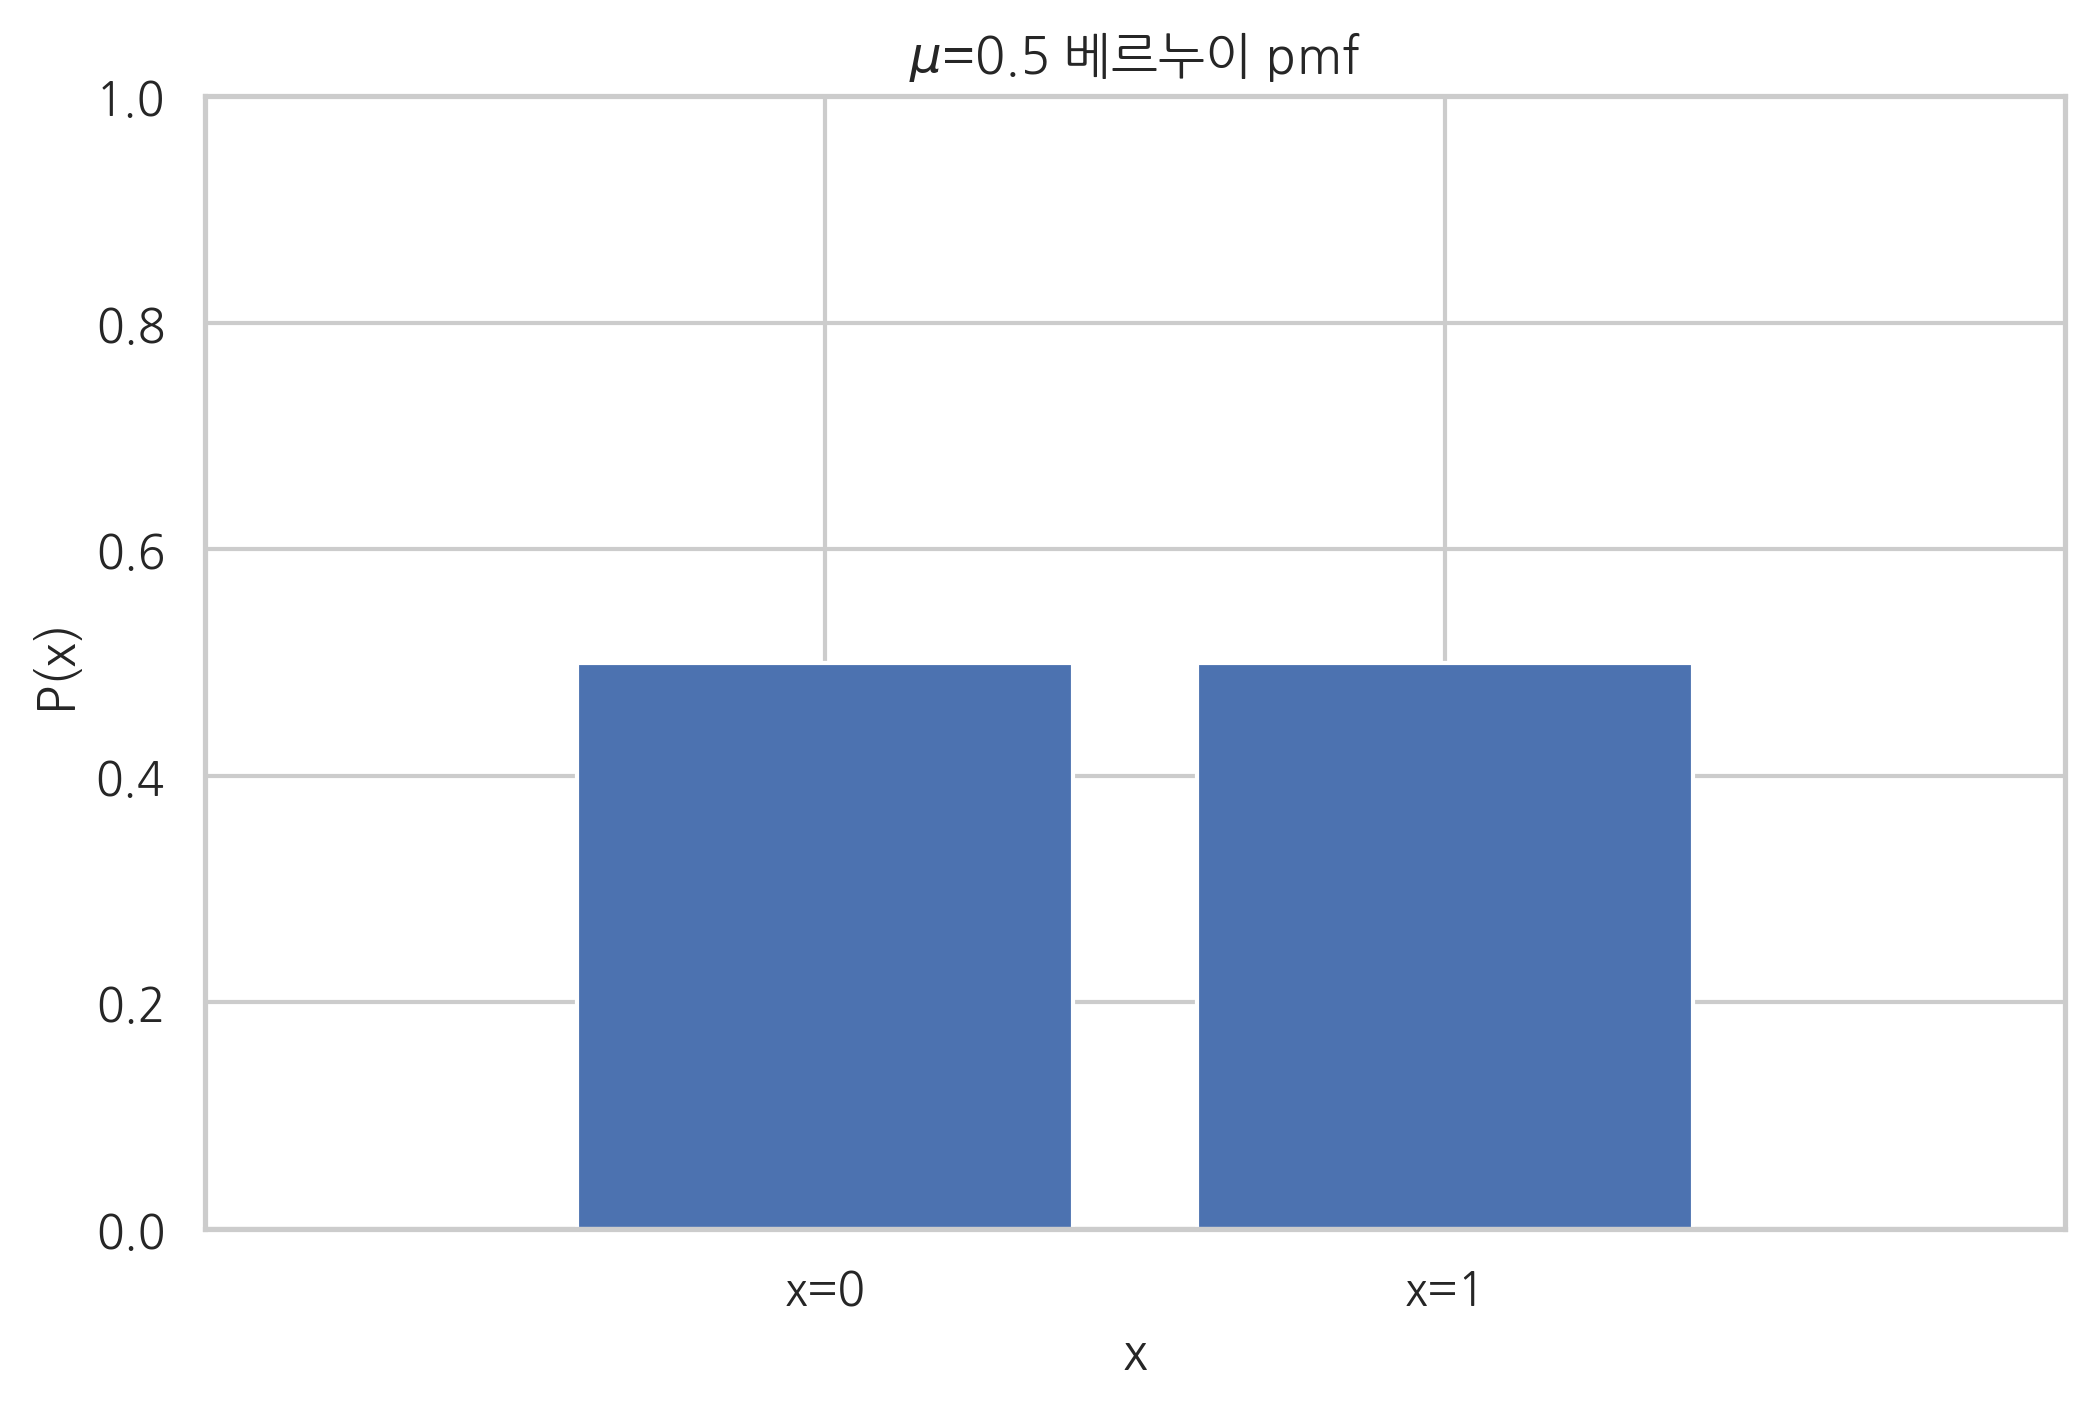

In [109]:
mu = 0.5
rv1 = sp.stats.bernoulli(mu)
x = rv1.rvs(10, random_state=0)
x1 = [0, 1]
plt.bar(x1, rv1.pmf(x1))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ['x=0', 'x=1'])
plt.ylabel('P(x)'); plt.xlabel('x')
plt.title(f'$\mu$={mu} 베르누이 pmf')
print(f'기댓값: {mu}, 분산: {mu*(1-mu)}')

기댓값: 0.9, 분산: 0.08999999999999998


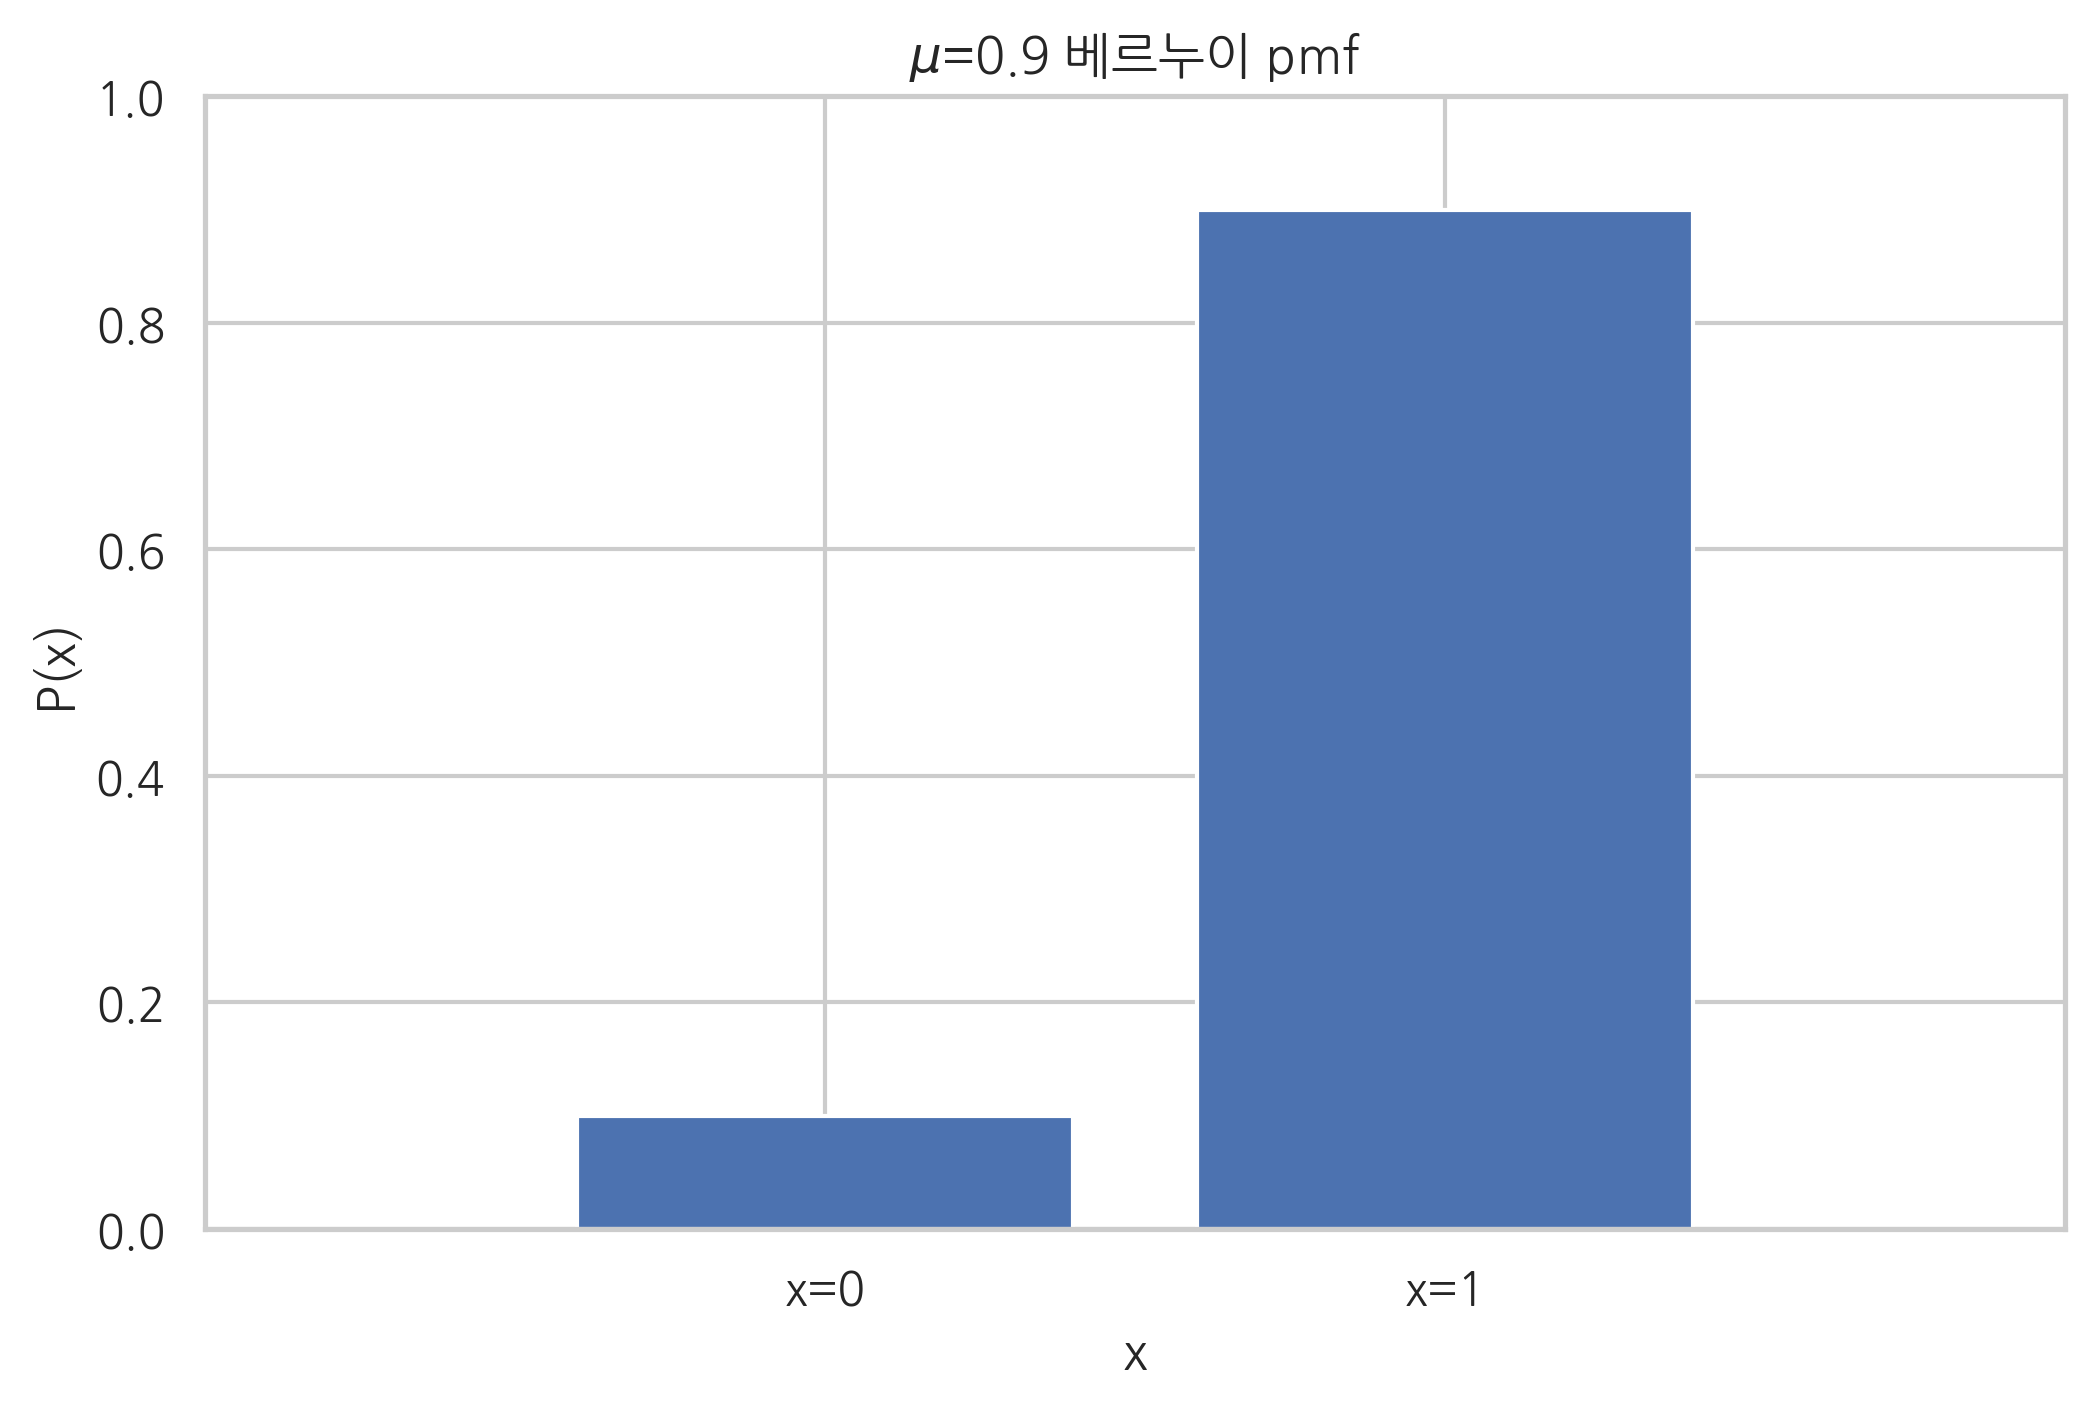

In [108]:
mu = 0.9
rv2 = sp.stats.bernoulli(mu)
x1 = [0, 1]
plt.bar(x1, rv2.pmf(x1))
plt.xlim(-1, 2)
plt.ylim(0, 1)
plt.xticks([0, 1], ['x=0', 'x=1'])
plt.ylabel('P(x)'); plt.xlabel('x')
plt.title(f'$\mu$={mu} 베르누이 pmf')
print(f'기댓값: {mu}, 분산: {mu*(1-mu)}')

#### 이항분포의 시뮬레이션

In [110]:
N = 10
mu = 0.6
rv = sp.stats.binom(N, mu)

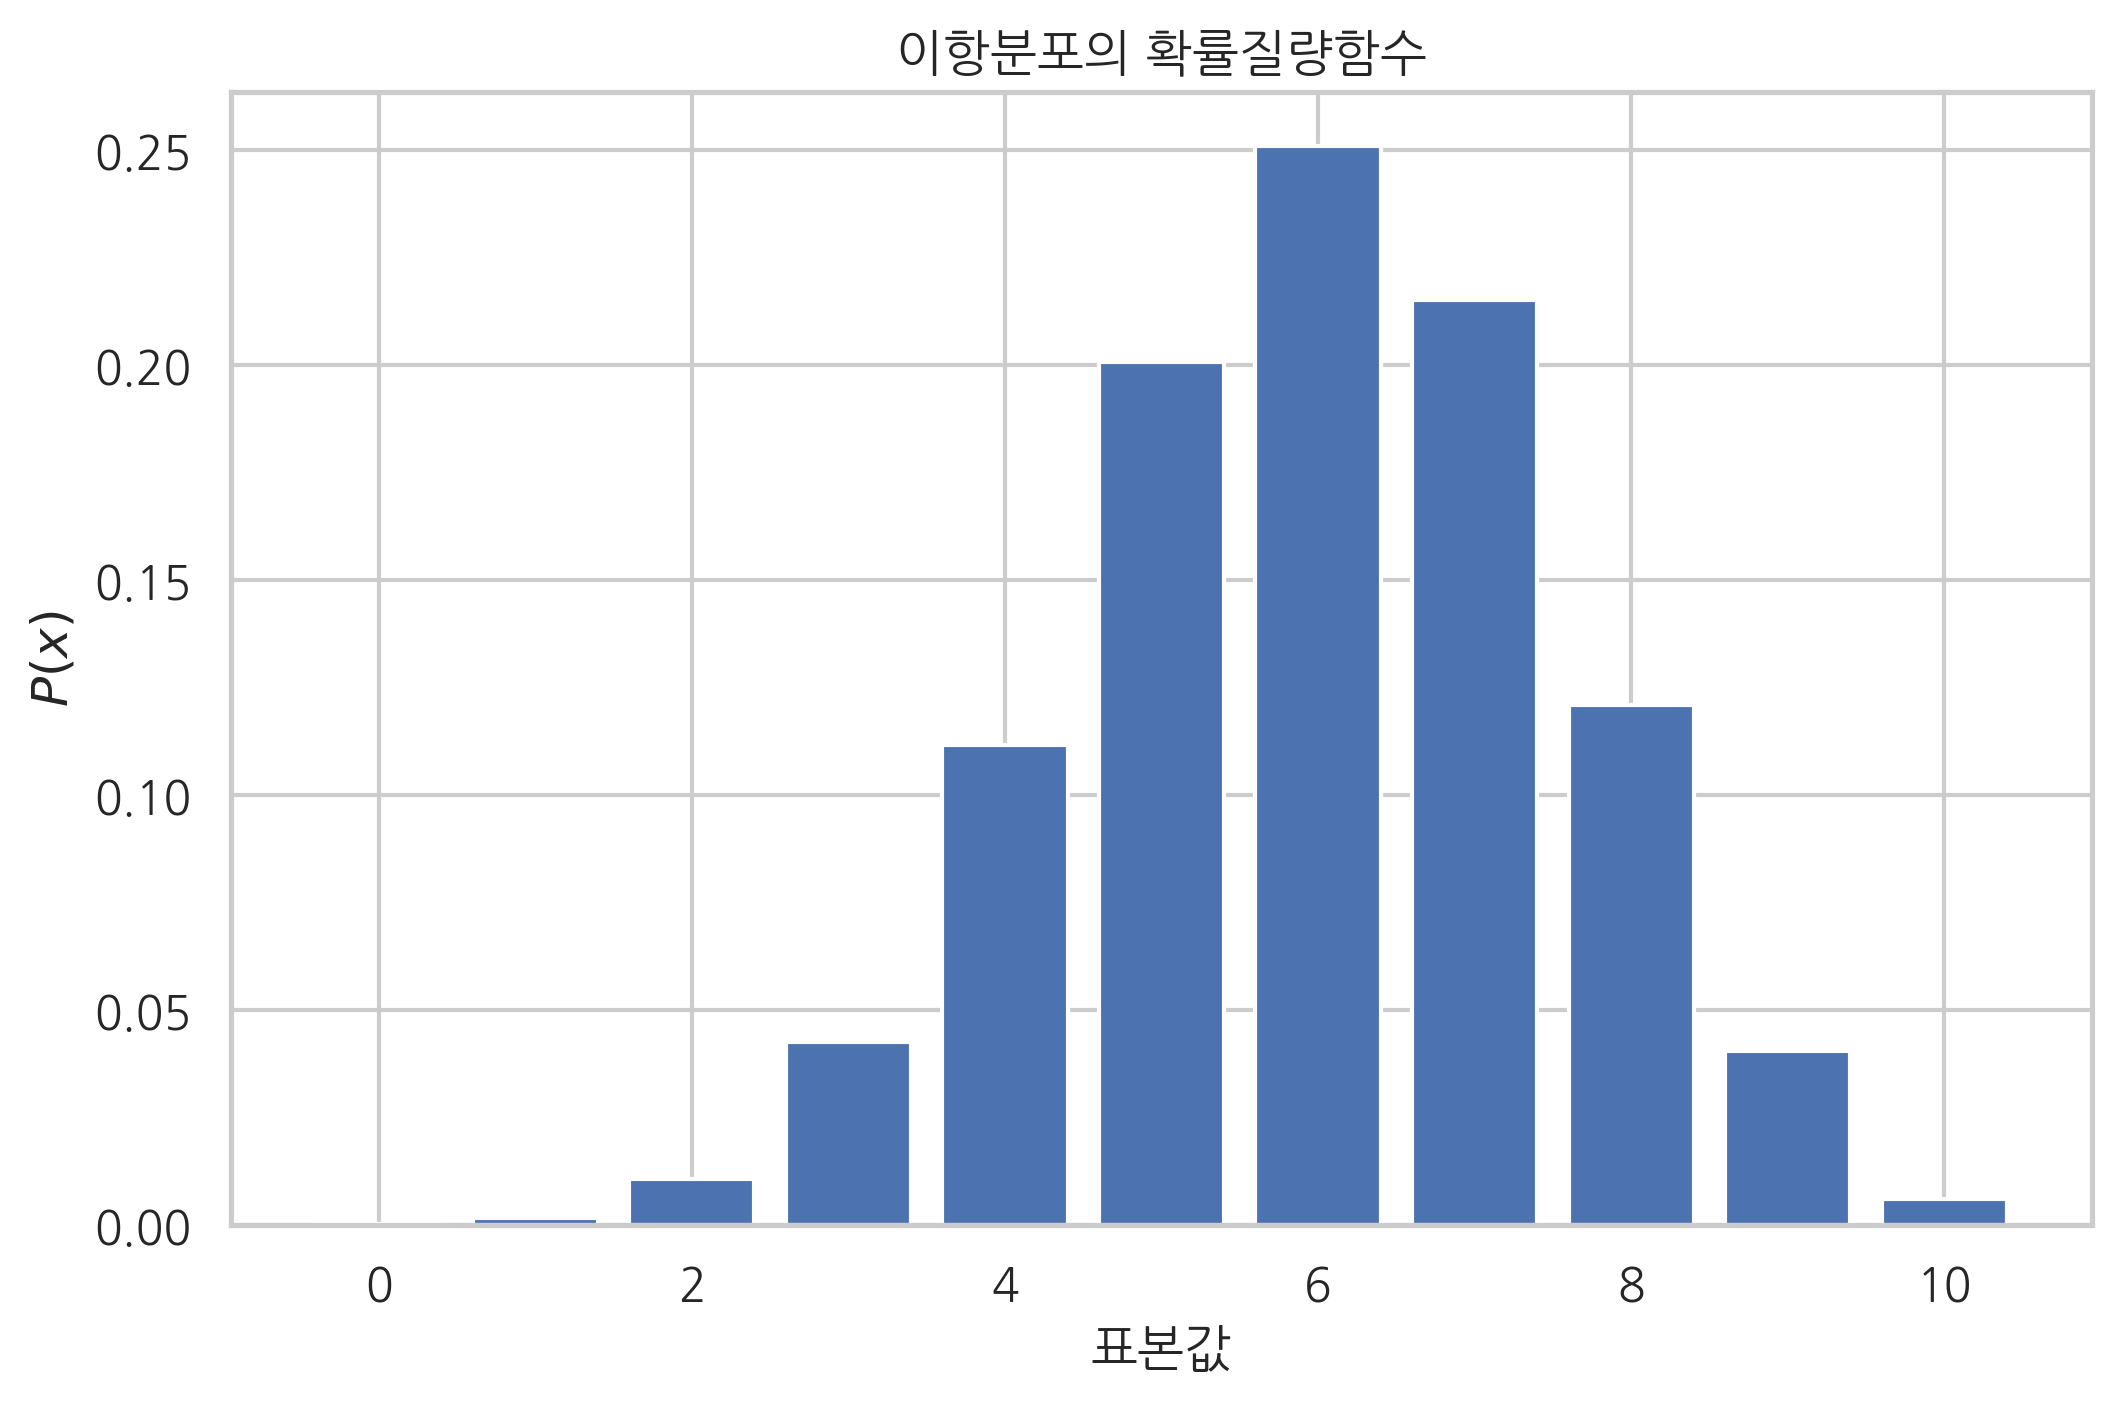

In [113]:
xx = np.arange(N + 1)
plt.bar(xx, rv.pmf(xx), align='center')
plt.xlabel('표본값'); plt.ylabel('$P(x)$')
plt.title('이항분포의 확률질량함수')
plt.show()

In [115]:
np.random.seed(0)
x = rv.rvs(100)
x

array([ 6,  5,  6,  6,  6,  5,  6,  4,  3,  6,  5,  6,  6,  4,  8,  8,  9,
        5,  5,  4,  3,  5,  6,  5,  8,  5,  8,  4,  6,  6,  7,  5,  6,  6,
        9,  6,  6,  6,  4,  5,  7,  6,  5,  8,  5,  5,  7,  8,  7,  7,  6,
        6,  2,  8,  7,  8,  5,  7,  6,  7,  8,  8,  5,  8,  7,  7,  5,  8,
        4,  8,  3,  6,  3,  6,  5,  9,  7,  8,  7,  8,  7,  6,  8,  5,  6,
        7,  6,  8,  6,  4,  7,  5,  8,  5,  7,  7,  6,  9,  5, 10])

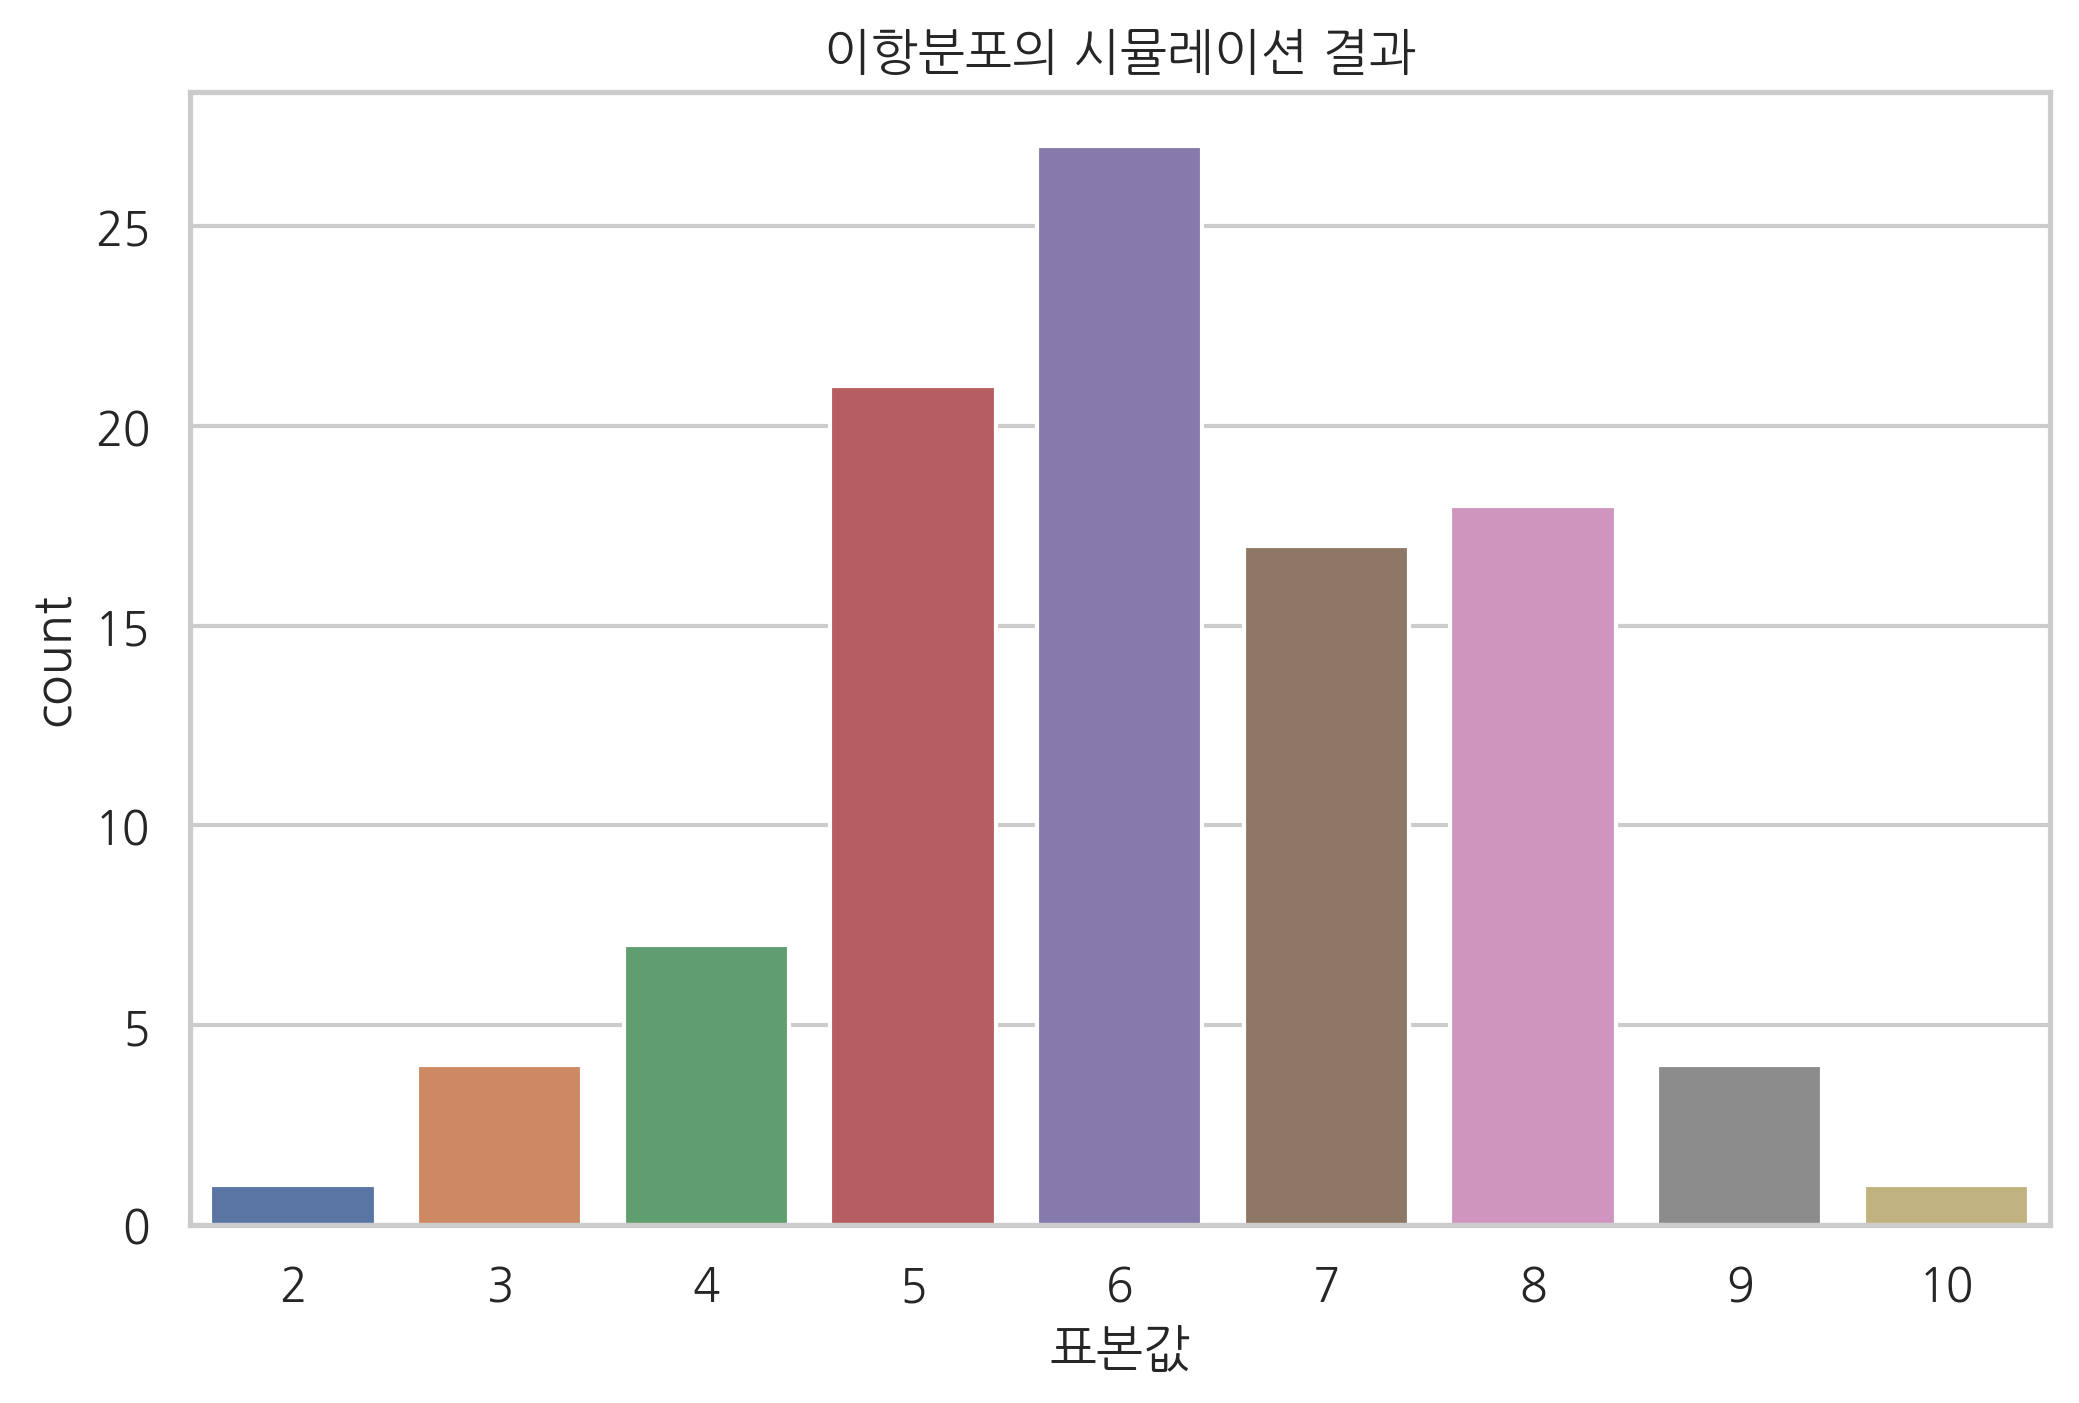

In [116]:
sns.countplot(x)
plt.title('이항분포의 시뮬레이션 결과')
plt.xlabel('표본값')
plt.show()

In [117]:
y = np.bincount(x, minlength=N+1)/float(len(x))
df = pd.DataFrame({'이론': rv.pmf(xx), '시뮬레이션': y}).stack()
df = df.reset_index()
df.columns = ['표본값', '유형', '비율']
df.pivot('표본값', '유형', '비율')
df

,표본값,유형,비율
0,0,이론,0.000105
1,0,시뮬레이션,0.000000
2,1,이론,0.001573
3,1,시뮬레이션,0.000000
4,2,이론,0.010617
5,2,시뮬레이션,0.010000
6,3,이론,0.042467
7,3,시뮬레이션,0.040000
8,4,이론,0.111477
9,4,시뮬레이션,0.070000


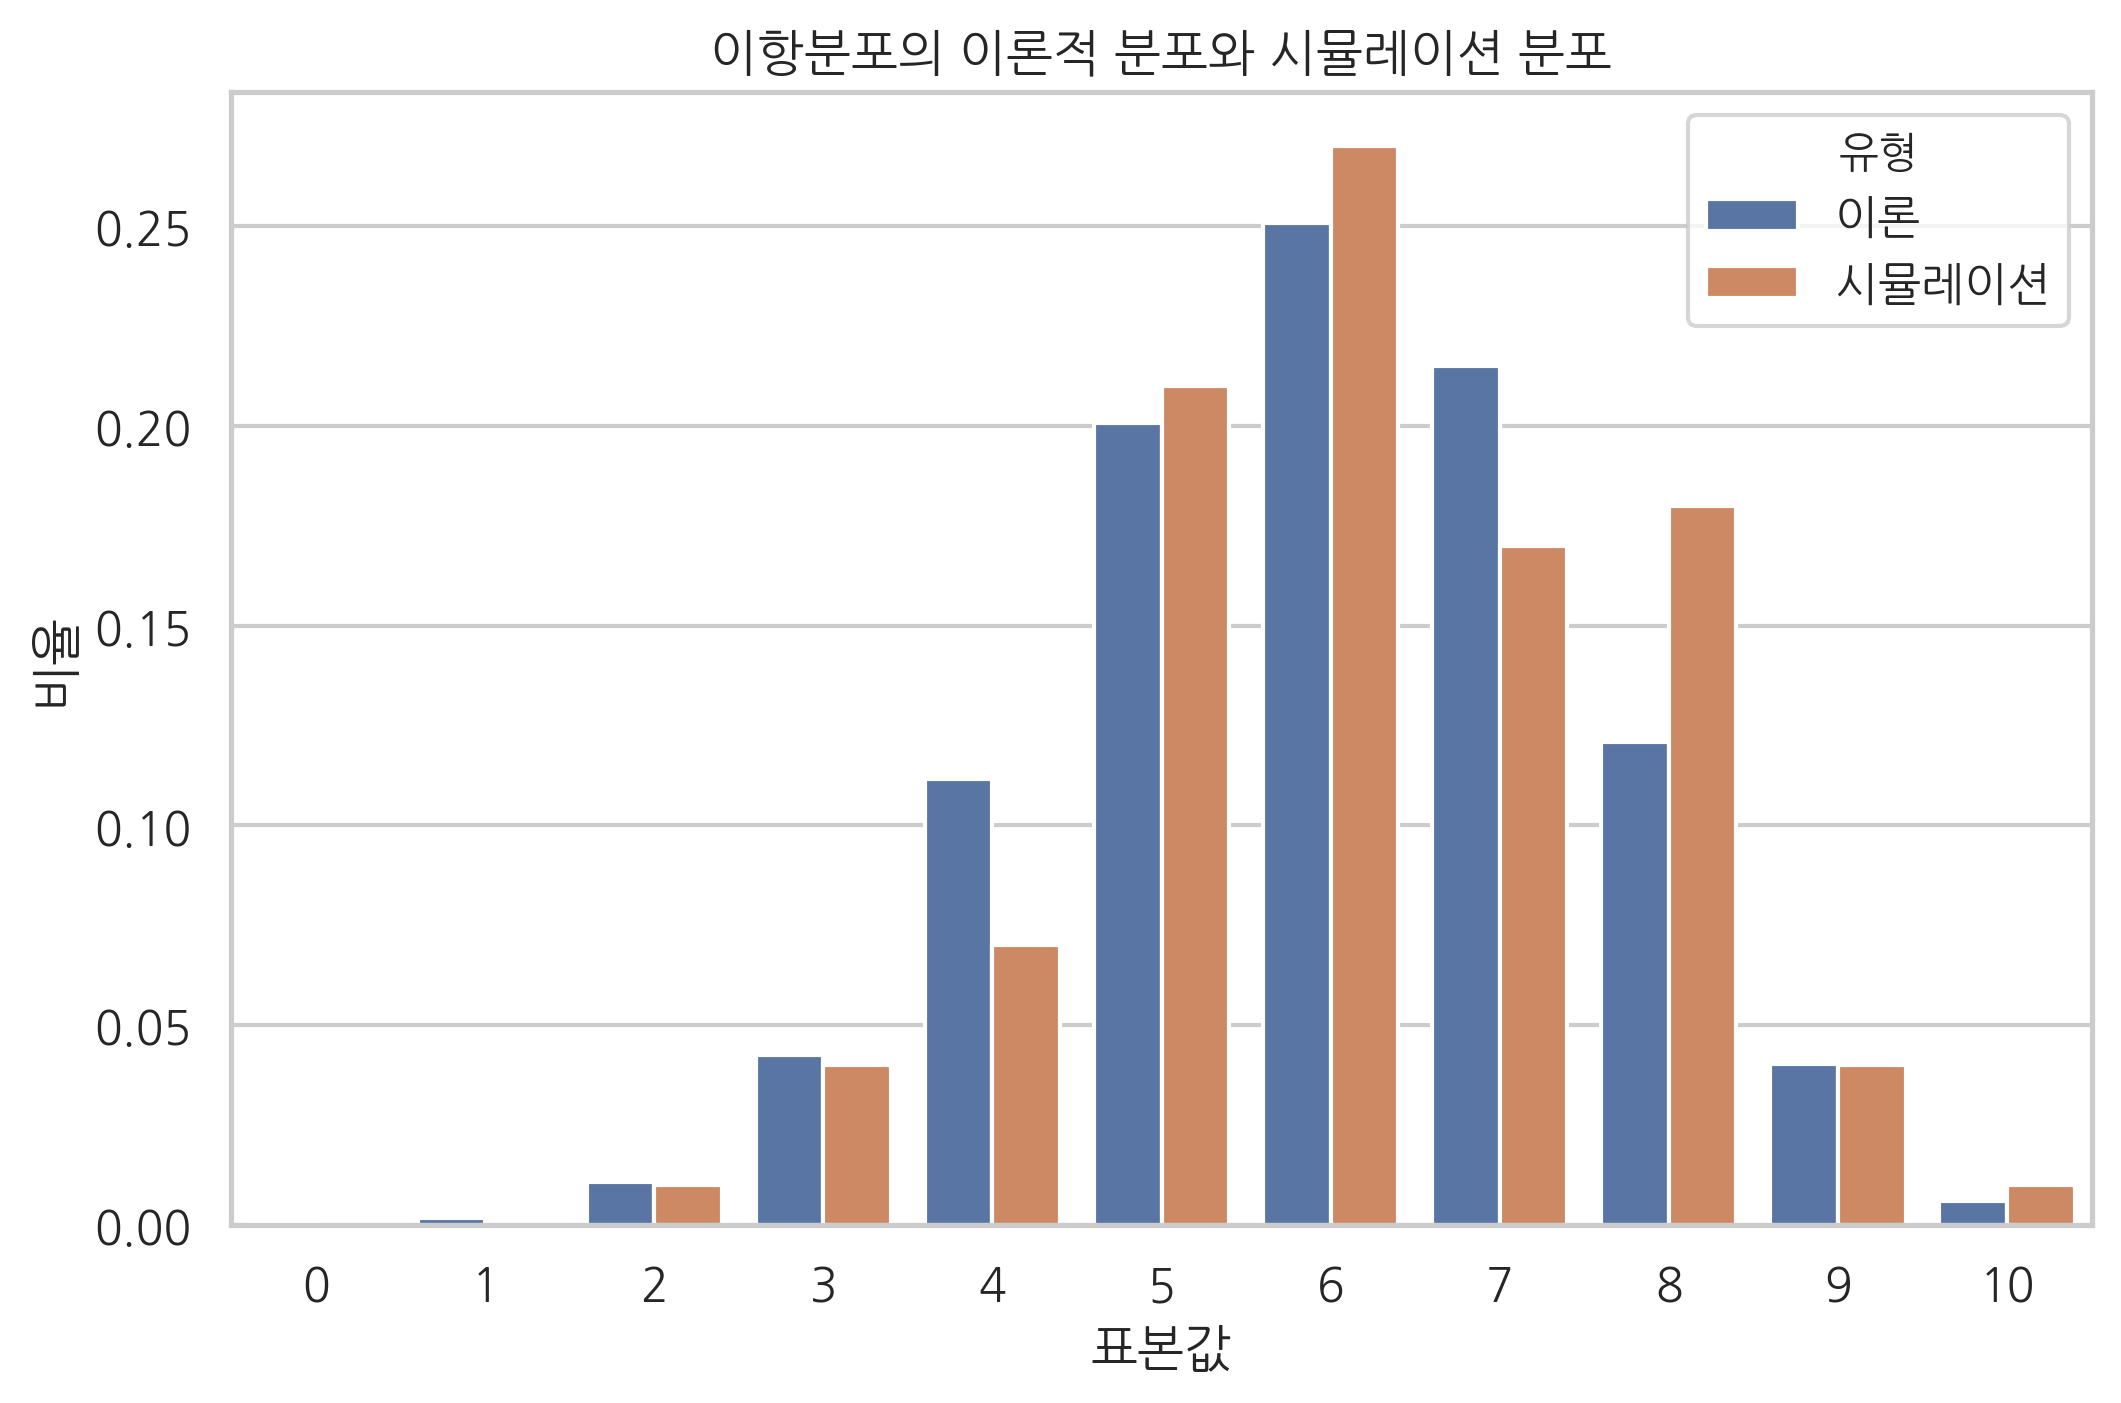

In [118]:
sns.barplot(x='표본값', y='비율', hue='유형', data=df)
plt.title('이항분포의 이론적 분포와 시뮬레이션 분포')
plt.show()